# Football Scout: Soccer Player Recommender System

![Football Scout](https://img.freepik.com/free-vector/sports-games-abstract-concept-illustration_335657-1857.jpg?w=740&t=st=1701988436~exp=1701989036~hmac=5208fa71a9c92bf6796facbae6839da3160fbe388b23ce87004614fbb2111f1f)
*Image Source:[Freepik.com](www.freepik.com)

# Table of Content

1. [Introduction](#introduction)
2. [Data Collection](#data-collection)
3. [Data Preprocessing](#data-preprocessing)
4. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis)
5. [Feature Engineering](#feature-engineering)
6. [Modeling](#modeling)
7. [Evaluation](#evaluation)
8. [Conclusion](#conclusion)

---

## 1. Introduction <a name="introduction"></a>
Your introduction goes here. Provide an overview of your data science project, the problem you are trying to solve, and the main objectives.

[Back to Top](#table-of-content)

---

Picture this: You are a team owner looking for the perfect addition to your squad. The Football Scout is a platform that offers player recommendations at your fingertips, becoming an additional tool your team can use to find suitable players.

Let's imagine your team is Manchester United, and Cristiano Ronaldo has left for the Saudi League. The best way to replace him might be to find a player similar to Cristiano Ronaldo.

Using data analytics and a bit of machine learning wizardry, the platform looks for players with a similar playing style to Cristiano Ronaldo. Some of the features it considers include height, rating, pace, preferred foot, position, etc.

In this notebook, we will walk through how we used the data to inform the solution.


### 1.1 Importing libraries

In [79]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text and NLP (Natural Language Processing)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tokenize import word_tokenize

# Data Preprocessing and Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Similarity Metrics
from sklearn.metrics.pairwise import cosine_similarity

# Warnings Handling
import warnings
warnings.filterwarnings("ignore")

## 2. Data Loading <a name="data-loading"></a>
In this section, explain where and how you gathered the data for your project. Discuss any challenges faced during data collection and how you addressed them.

[Back to Top](#table-of-content)

---

The data used in the notebook was found on Kaggle, and I am unsure about the integrity and accuracy of the data. There is no background information about its source. In this case, we intentionally ignored this fact about the data as we are working on creating a proof of concept. Upon initial inspection of the features in the dataset, I deemed it good enough to create a POC.  
  
  
[source](https://www.kaggle.com/datasets/antoinekrajnc/soccer-players-statistics)

In [80]:
# reading the csv file
df = pd.read_csv(
    'https://raw.githubusercontent.com/Vambane/SoccerPlayerRecommender/main/FullData.csv')

In [81]:
df.head()  # viewing the first five rows of the datasets

Name Nationality National_Position  National_Kit  \
0  Cristiano Ronaldo    Portugal                LS           7.0   
1       Lionel Messi   Argentina                RW          10.0   
2             Neymar      Brazil                LW          10.0   
3        Luis Suárez     Uruguay                LS           9.0   
4       Manuel Neuer     Germany                GK           1.0   

           Club Club_Position  Club_Kit Club_Joining  Contract_Expiry  Rating  \
0   Real Madrid            LW       7.0   07/01/2009           2021.0      94   
1  FC Barcelona            RW      10.0   07/01/2004           2018.0      93   
2  FC Barcelona            LW      11.0   07/01/2013           2021.0      92   
3  FC Barcelona            ST       9.0   07/11/2014           2021.0      92   
4     FC Bayern            GK       1.0   07/01/2011           2021.0      92   

   ... Long_Shots Curve Freekick_Accuracy Penalties  Volleys GK_Positioning  \
0  ...         90    81                76        85       88             14   
1  ...         88    89                90        74       85             14   
2  ...         77    79                84        81       83             15   
3  ...         86    86                84        85       88             33   
4  ...         16    14                11        47       11             91   

  GK_Diving  GK_Kicking  GK_Handling  GK_Reflexes  
0         7          15           11           11  
1         6          15           11            8  
2         9          15            9           11  
3        27          31           25           37  
4        89          95           90           89  

[5 rows x 53 columns]

## 3. Data Preprocessing <a name="data-preprocessing"></a>
Detail the steps you took to clean and preprocess the raw data. This may include handling missing values, data transformation, and normalization.

[Back to Top](#table-of-content)

---



Now that we've loaded the dataset, the next step is to investigate for elements such as missing data, duplicates, and outliers.

In [82]:
df.info() # Looking for null values in the dataset across all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                17588 non-null  object 
 1   Nationality         17588 non-null  object 
 2   National_Position   1075 non-null   object 
 3   National_Kit        1075 non-null   float64
 4   Club                17588 non-null  object 
 5   Club_Position       17587 non-null  object 
 6   Club_Kit            17587 non-null  float64
 7   Club_Joining        17587 non-null  object 
 8   Contract_Expiry     17587 non-null  float64
 9   Rating              17588 non-null  int64  
 10  Height              17588 non-null  object 
 11  Weight              17588 non-null  object 
 12  Preffered_Foot      17588 non-null  object 
 13  Birth_Date          17588 non-null  object 
 14  Age                 17588 non-null  int64  
 15  Preffered_Position  17588 non-null  object 
 16  Work

The `National_Position` and `National_Kit` columns have the highest number of missing values, likely indicating players who have not been selected for their respective national teams. The platform is designed based on a player's abilities, and removing the nationality and kit number columns won't impact the overall functionality of the recommender. While there may be other columns to consider removing later, these are the primary ones to address for now.

###### Investigating the number of  columns in the dataset.

In [83]:
print(f'There are {str(len(df.columns))} columns in this dataset.')

There are 53 columns in this dataset.


In [84]:
print(f'These are the columns:')
for column in df.columns:
    print(column)

These are the columns:
Name
Nationality
National_Position
National_Kit
Club
Club_Position
Club_Kit
Club_Joining
Contract_Expiry
Rating
Height
Weight
Preffered_Foot
Birth_Date
Age
Preffered_Position
Work_Rate
Weak_foot
Skill_Moves
Ball_Control
Dribbling
Marking
Sliding_Tackle
Standing_Tackle
Aggression
Reactions
Attacking_Position
Interceptions
Vision
Composure
Crossing
Short_Pass
Long_Pass
Acceleration
Speed
Stamina
Strength
Balance
Agility
Jumping
Heading
Shot_Power
Finishing
Long_Shots
Curve
Freekick_Accuracy
Penalties
Volleys
GK_Positioning
GK_Diving
GK_Kicking
GK_Handling
GK_Reflexes


As mentioned above, we have to investigate the 'National_Position' and 'Kit' columns before dropping them.

In [85]:
df[df['National_Position'] == 'LM'].head() # LM is a left midfielder

Name Nationality National_Position  National_Kit  \
39        David Silva       Spain                LM          21.0   
45        David Alaba     Austria                LM           8.0   
76      Dimitri Payet      France                LM           8.0   
86   Yannick Carrasco     Belgium                LM          18.0   
123        João Mário    Portugal                LM          10.0   

                Club Club_Position  Club_Kit Club_Joining  Contract_Expiry  \
39   Manchester City           LCM      21.0   07/14/2010           2019.0   
45         FC Bayern            LB      27.0   02/10/2010           2021.0   
76   Olym. Marseille            LW      11.0   01/29/2017           2021.0   
86   Atlético Madrid            LM      10.0   07/10/2015           2022.0   
123            Inter           Sub       6.0   08/28/2016           2021.0   

     Rating  ... Long_Shots Curve Freekick_Accuracy Penalties  Volleys  \
39       87  ...         74    83                77        77       80   
45       86  ...         83    78                83        80       68   
76       85  ...         83    90                91        76       79   
86       84  ...         75    81                78        74       68   
123      83  ...         73    74                67        66       69   

    GK_Positioning GK_Diving  GK_Kicking  GK_Handling  GK_Reflexes  
39               1         1           1            1            1  
45              15         5          14            7            9  
76              14        11           9           15           12  
86              10         9           9           11           10  
123              8         6           8           15            8  

[5 rows x 53 columns]

With some football knowledge, the assumption we made above, that most of the missing values represent players who have not played for their respective national teams, is correct. Due to the significant number of missing values, we can now drop these two columns.

In [86]:
df = df.drop(['National_Position', 'National_Kit'], axis = 1) # dropping the columns

We have now created a subset without the columns mentioned above and checked the columns again to confirm that we are dropping them.

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                17588 non-null  object 
 1   Nationality         17588 non-null  object 
 2   Club                17588 non-null  object 
 3   Club_Position       17587 non-null  object 
 4   Club_Kit            17587 non-null  float64
 5   Club_Joining        17587 non-null  object 
 6   Contract_Expiry     17587 non-null  float64
 7   Rating              17588 non-null  int64  
 8   Height              17588 non-null  object 
 9   Weight              17588 non-null  object 
 10  Preffered_Foot      17588 non-null  object 
 11  Birth_Date          17588 non-null  object 
 12  Age                 17588 non-null  int64  
 13  Preffered_Position  17588 non-null  object 
 14  Work_Rate           17588 non-null  object 
 15  Weak_foot           17588 non-null  int64  
 16  Skil

In [88]:
# now instead of checking non-null values, we can look at how many values are missing by adding the same of missing values
df.isna().sum()

Name                  0
Nationality           0
Club                  0
Club_Position         1
Club_Kit              1
Club_Joining          1
Contract_Expiry       1
Rating                0
Height                0
Weight                0
Preffered_Foot        0
Birth_Date            0
Age                   0
Preffered_Position    0
Work_Rate             0
Weak_foot             0
Skill_Moves           0
Ball_Control          0
Dribbling             0
Marking               0
Sliding_Tackle        0
Standing_Tackle       0
Aggression            0
Reactions             0
Attacking_Position    0
Interceptions         0
Vision                0
Composure             0
Crossing              0
Short_Pass            0
Long_Pass             0
Acceleration          0
Speed                 0
Stamina               0
Strength              0
Balance               0
Agility               0
Jumping               0
Heading               0
Shot_Power            0
Finishing             0
Long_Shots      

### Creating a BMI

As we are dealing with a sports-related dataset, one useful column to create for measuring player fitness is the Body Mass Index (BMI). This column is currently absent in the dataset, and when searching for a player, knowing their BMI can be valuable information. Additionally, we will explore the correlation of BMI with other features in the dataset.

The Body Mass Index is calculated using the formula:  

**BMI = (Weight in kilograms) / (Height in metres)^2**

In [89]:
# Selecting the two columns to how their are populated in the dataset.
df[['Weight', 'Height']].head()

Weight  Height
0  80 kg  185 cm
1  72 kg  170 cm
2  68 kg  174 cm
3  85 kg  182 cm
4  92 kg  193 cm

In [90]:
# Checking the column datatypes
df[['Weight', 'Height']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Weight  17588 non-null  object
 1   Height  17588 non-null  object
dtypes: object(2)
memory usage: 274.9+ KB


They are both objects, and we need to convert them into **integers**. Additionally, we need to remove the SI units for both the Weight and Height.

In [91]:
df['Weight'] = df['Weight'].str.replace('kg', '')  # Removing the kilogram
df['Height'] = df['Height'].str.replace('cm', '')  # Removing the centimeters

# Now we have to convert the datatypes of these two columns
# First we will create a coversion dictionary
convert_dict = {'Height': float,
                'Weight': float
                }
# This will use the dictionary to just convert the two columns. I choose floats because I will have to divide the columns to calculate BMI
df = df.astype(convert_dict)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                17588 non-null  object 
 1   Nationality         17588 non-null  object 
 2   Club                17588 non-null  object 
 3   Club_Position       17587 non-null  object 
 4   Club_Kit            17587 non-null  float64
 5   Club_Joining        17587 non-null  object 
 6   Contract_Expiry     17587 non-null  float64
 7   Rating              17588 non-null  int64  
 8   Height              17588 non-null  float64
 9   Weight              17588 non-null  float64
 10  Preffered_Foot      17588 non-null  object 
 11  Birth_Date          17588 non-null  object 
 12  Age                 17588 non-null  int64  
 13  Preffered_Position  17588 non-null  object 
 14  Work_Rate           17588 non-null  object 
 15  Weak_foot           17588 non-null  int64  
 16  Skil

Converting the height from centimeters to meters and then calculating the BMI.

In [92]:
# Converting the cenetimeters to meters
df['Height (m)'] = df['Height'] / 100

In [93]:
# Creating a new BMI column
df['BMI'] = round(df['Weight'] / (df['Height (m)'] * df['Height (m)']), 2)
df['BMI']

0        23.37
1        24.91
2        22.46
3        25.66
4        24.70
         ...  
17583    24.49
17584    23.37
17585    20.38
17586    24.69
17587    22.50
Name: BMI, Length: 17588, dtype: float64

## 4. Exploratory Data Analysis (EDA) <a name="exploratory-data-analysis"></a>
Present the results of your EDA, visualizations, and insights gained from analyzing the dataset. Identify patterns, correlations, and any interesting findings.

[Back to Top](#table-of-contents)

---


### Nationality

We have broken down the different sections of the dataset that we are going to visualize. This will create a cleaner and easier-to-manage notebook. The first section examines the nationality distribution of the players.NOTE: is that the dataset is based on the top five leagues in Europe.

In [94]:
# Randomly looking the number of players per nationality, looking at the last countries in the list (A-Z)
df.groupby('Nationality').count().tail()

Name  Club  Club_Position  Club_Kit  Club_Joining  \
Nationality                                                      
Uzbekistan      3     3              3         3             3   
Venezuela      42    42             42        42            42   
Wales         122   122            122       122           122   
Zambia          4     4              4         4             4   
Zimbabwe       10    10             10        10            10   

             Contract_Expiry  Rating  Height  Weight  Preffered_Foot  ...  \
Nationality                                                           ...   
Uzbekistan                 3       3       3       3               3  ...   
Venezuela                 42      42      42      42              42  ...   
Wales                    122     122     122     122             122  ...   
Zambia                     4       4       4       4               4  ...   
Zimbabwe                  10      10      10      10              10  ...   

             Freekick_Accuracy  Penalties  Volleys  GK_Positioning  GK_Diving  \
Nationality                                                                     
Uzbekistan                   3          3        3               3          3   
Venezuela                   42         42       42              42         42   
Wales                      122        122      122             122        122   
Zambia                       4          4        4               4          4   
Zimbabwe                    10         10       10              10         10   

             GK_Kicking  GK_Handling  GK_Reflexes  Height (m)  BMI  
Nationality                                                         
Uzbekistan            3            3            3           3    3  
Venezuela            42           42           42          42   42  
Wales               122          122          122         122  122  
Zambia                4            4            4           4    4  
Zimbabwe             10           10           10          10   10  

[5 rows x 52 columns]

Looking at the top 10 countries with the most players represented in the dataset. 

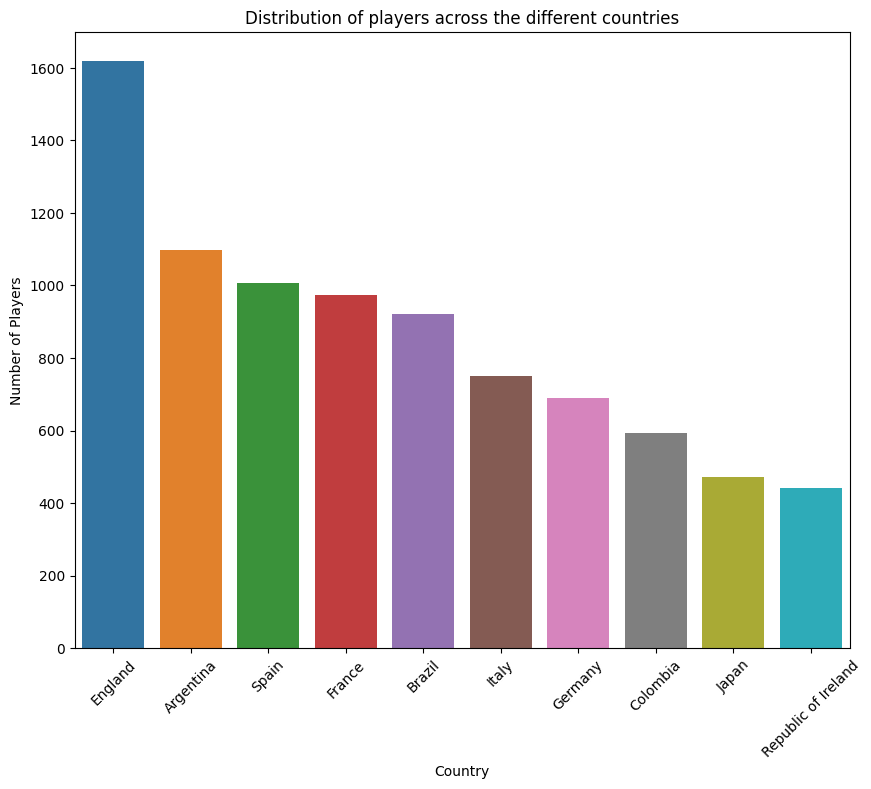

In [95]:
# Calculating the number of occurence of a specific nationality, the will result in a df
country_counts = df["Nationality"].value_counts().reset_index()
# Renaming the resulting columns to 'Country' and 'Number of Players'
country_counts.columns = ['Country', 'Number of Players']

# Selecting the top 10 countries
top_10_countries = country_counts.head(10)
# figure size
plt.figure(figsize=(10, 8))

sns.barplot(x='Country', y="Number of Players", data=top_10_countries)
plt.title('Distribution of players across the different countries')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()

England has more than 500 players than the closest country, which is Argentina. In the top 10, six of the countries are European, three are from South America, and one is from Asia. The top five leagues in Europe source their players from these various countries, with England being the primary source for European players and Argentina serving as the South American hub for footballers.

### Team  
In this next section, we are going to investigate which team has the most amount of registered players in their respective leagues.

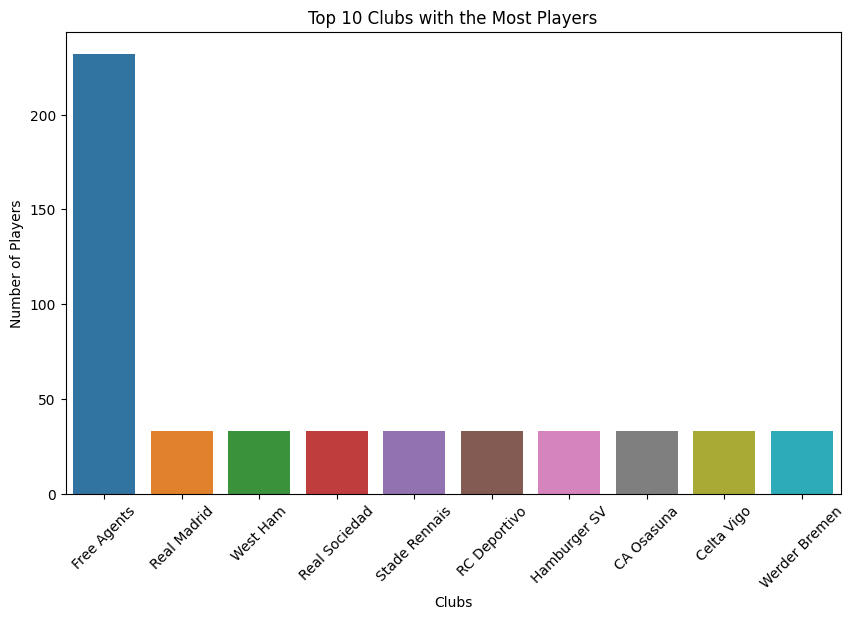

In [96]:
# Calculating the number of occurence of a specific club, the will result in a df
club_counts = df['Club'].value_counts().reset_index()
club_counts.columns = ['Club', 'Number of Players']

# Top 10 clubs based on the squad size
top_10_clubs = club_counts.head(10)

# figure size
plt.figure(figsize=(10,6))

sns.barplot(x='Club', y='Number of Players', data=top_10_clubs)
plt.title('Top 10 Clubs with the Most Players')
plt.xlabel('Clubs')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()

Many players in the dataset are currently free agents, and all other teams share a consistent number of players. Through further research, I observed that this pattern may be attributed to the regulations set by European leagues concerning player registration for a season. In this context, teams were allowed to register 33 players, with 8 of them designated as locally developed 'grown talents'. One can also notice that teams come from different countries/leagues.

### Club Position

All the players in the dataset play in different positions on the field. In the next visualization, we will look into the distribution of various positions, identifying which positions have the highest number of players and which positions might pose challenges when seeking replacements.

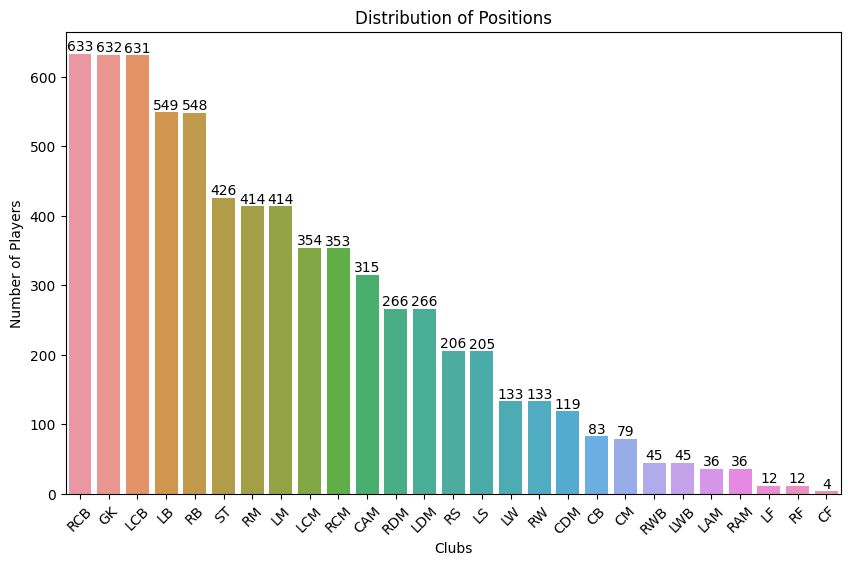

In [97]:
# The code below will ignore the Res and Sub values, this is to create a cleaner graph
position_df = df[df['Club_Position'].isin(['Res', 'Sub']) == False]

# Calculating the number of occurence of a specific field position, the will result in a df
club_counts = position_df['Club_Position'].value_counts().reset_index() 
club_counts.columns = ['Position', 'Number of Players']

# Top 10 clubs based on the squad size
#top_10_clubs = club_counts.head(10)

# figure size
plt.figure(figsize=(10,6))

sns.barplot(x='Position', y='Number of Players', data=club_counts)
plt.title('Distribution of Positions')
plt.xlabel('Clubs')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)

# This part of the code annotates the values in the bar graph below
for index, value in enumerate(club_counts['Number of Players']):
    plt.text(index, value, str(value), ha='center', va='bottom') 
    
plt.show()

**NOTE**: There are three main positions in football: defenders (backs), midfielders, and strikers(forwards). The abbreviations of the positions above inform us about the position a player plays. From the graph, we can observe that there are many defenders, and the number decreases as we move forward to midfielders and strikers(forwards). Other positions with fewer players include roles like center-back and right/left wing-back. These are positions where finding replacements in the market might be challenging.

### Height v Weight

We will explore the relationship between height and weight, incorporating how the BMI is distributed.

In [229]:
def classify_bmi(bmi):
    """
    Classify BMI into categories.
    """
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Normal"
    elif 25 <= bmi < 29.9:
        return "Overweight"
    else:
        return "Obese"

We have created a column that will classify the BMI into four categories Underweight, Normal, Overweight and Obese.

In [230]:
df['BMI_Category'] = df['BMI'].apply(classify_bmi)

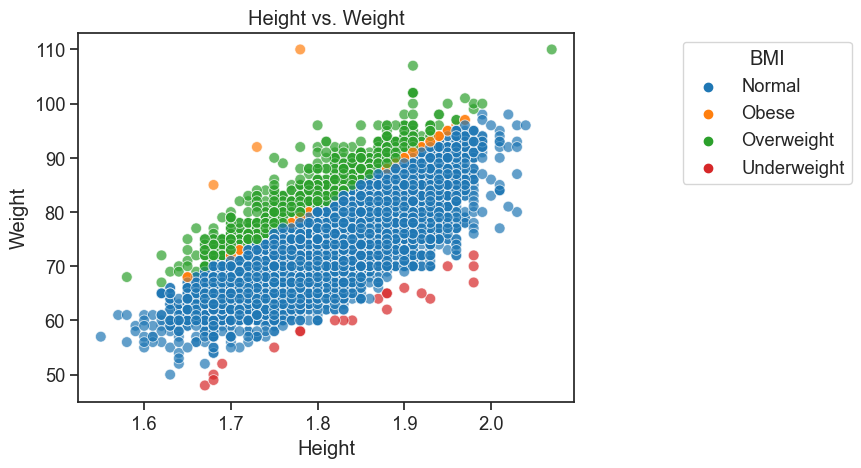

In [234]:
sns.scatterplot(x='Height (m)', y='Weight', data=df, hue='BMI_Category',
                palette='tab10', s=60, edgecolor='w', alpha=0.7)

# Add a legend for the hue
plt.legend(title='BMI', loc='best', bbox_to_anchor=(1.2, 1))

plt.title('Height vs. Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

There is a positive correlation between height and weight in the dataset. I have created a legend to also show the distribution of BMI in the graph. As they are athletes, most of them have a normal BMI, while a few of them are overweight or underweight.

In [99]:
df['Club_Position'].unique()

array(['LW', 'RW', 'ST', 'GK', 'Sub', 'RCM', 'CAM', 'LCB', 'LCM', 'RS',
       'RB', 'RCB', 'LM', 'LDM', 'RM', 'LB', 'CDM', 'RDM', 'LF', 'CB',
       'LAM', 'Res', 'CM', 'LS', 'RF', 'RWB', 'RAM', 'LWB', nan, 'CF'],
      dtype=object)

In the column, we have 'nan' values. In the code below, I will convert the positions into 6 categories: Goalkeeper, Defender, Midfielder, Striker, Sub, and Reserve. The 'nan' values will be replaced with Reserve. The rationale behind this decision is that players with no labeled positions would be considered reserves.

In [235]:
def categorize_position(position):
    '''
    This function will shrink the unique football positions into the
    three basic positions with the two additional substitute and reserves
    position.

    This will make it easier to quantify the ratio of each position relative
    to the to other
    '''

    if position in ['GK']:
        return 'Goalkeeper'
    elif position in ['RB', 'RCB', 'LB', 'LCB', 'CB', 'RWB', 'LWB']:
        return 'Defender'
    elif position in ['LW', 'RW', 'RCM', 'CAM', 'LCM', 'LM', 'RM', 'CDM', 'RDM', 'LDM', 'CAM', 'CM', 'RAM']:
        return 'Midfielder'
    elif position in ['RS', 'LF', 'LS', 'RF', 'CF']:
        return 'Striker'
    elif position in ['Sub']:
        return 'Substitute'
    else:
        return 'Reserve'

# applying the 'categorize position' to create a new column
df['Positions'] = df['Club_Position'].apply(categorize_position)
df['Positions'] = df['Positions'].fillna('Reserve')

In [237]:
df.groupby('Positions')['Name'].nunique()

Positions
Defender      2524
Goalkeeper     631
Midfielder    2871
Reserve       3597
Striker        439
Substitute    7441
Name: Name, dtype: int64

Now we will look at the distribution of the players in the different positions. 

<Axes: xlabel='Positions', ylabel='count'>

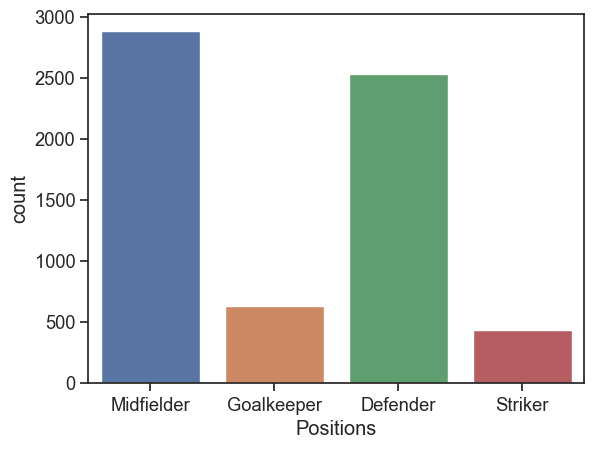

In [240]:
# The code below will ignore the Res and Sub values, this is to create a cleaner graph
position_df = df[df['Positions'].isin(['Reserve', 'Substitute']) == False]
sns.countplot(data=position_df, x="Positions")

The main starting 11 has three categories of players on the field:

1. `Goalkeeper`
2. `Defender`
3. `Midfielder`
4. `Striker`  

Looking at the starting 11, there is a higher proportion of midfielders and defensive players than both strikers and goalkeepers. Out of the 11 players, the goalkeeper and striker make up about ~25-27%. This could be the reason why there are fewer strikers and goalkeepers than the other positions in the transfer market. The distribution of positions code show this.

I have ignored the substitutes and reserve players to focus solely on the starting 11.

## Positions Differences  

In the following two charts we looking at a features and how they are distributed across the different positions. The other goal is to test the best way to analyse individual players. We will use two graphs:
1. **Multi-line graph**, and
2. **Radar chart**

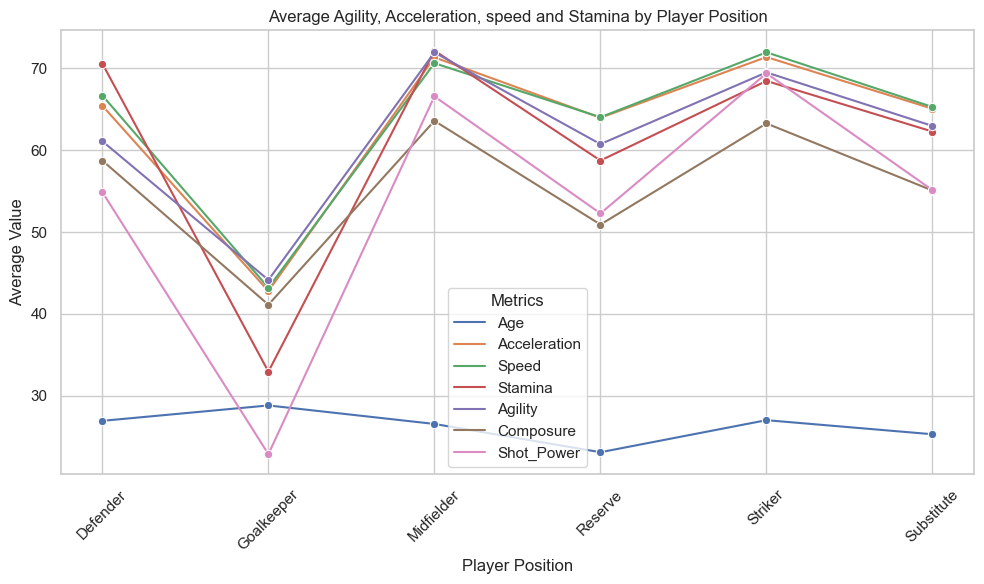

In [244]:
'''
Grouping the data by position and then plotting a multi-line line
chart to show they average data for each position
'''

numeric_df = df[['Positions', 'Age', 'Acceleration', 'Speed',
                 'Stamina', 'Agility', 'Composure', 'Shot_Power']]

# group by position and calculate the mean
avg_stats_by_position = numeric_df.groupby('Positions').mean().reset_index()

# melting the df from wide to long for ease of plotting
melted_df = pd.melt(avg_stats_by_position, id_vars=['Positions'], value_vars=[
                    'Age', 'Acceleration', 'Speed', 'Stamina', 'Agility', 'Composure', 'Shot_Power'])

# Line plot features
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.lineplot(data=melted_df, x='Positions',
             y='value', hue='variable', marker='o')

plt.title('Average Agility, Acceleration, speed and Stamina by Player Position')
plt.xlabel('Player Position')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Metrics', loc='best')

plt.tight_layout()
plt.show()

### Using a Radar chart to show the difference in the above characteristics

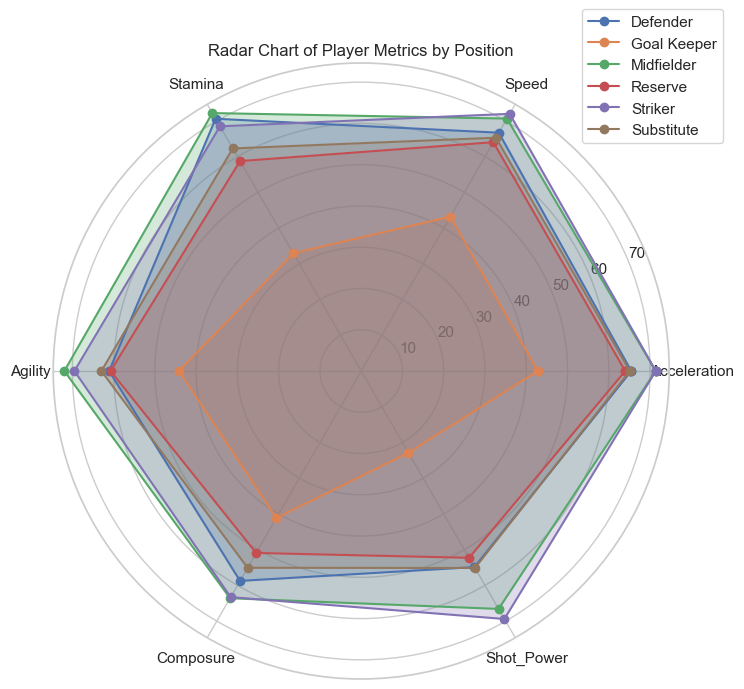

In [104]:
avg_stats_by_position = numeric_df.groupby('Positions').mean()

# List of the metric names
metrics = avg_stats_by_position.columns[1:]

#number of metrics
num_metrics = len(metrics)

#create a list values for each metric
values = avg_stats_by_position.iloc[:, 1:].values.tolist()

# Player Positions 
positions = avg_stats_by_position.index.tolist()

# Calculate angles for each axis
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False)

# Closing the radar plot
angles = np.concatenate((angles, [angles[0]]))

#Creatinng the plot
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)

#Plot each player position values
for i, (position, value) in enumerate(zip(positions, values)):
    ax.plot(angles, value + value[:1], marker='o', label=position)
    ax.fill(angles, value + value[:1], alpha=0.25)
    
#Set the labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.yaxis.grid(True)

# Set the title and legend
plt.title('Radar Chart of Player Metrics by Position')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()

## Creating subsets for the different positions

### 1. Goal Keeper

In [105]:
df['Club_Position'].unique()

array(['LW', 'RW', 'ST', 'GK', 'Sub', 'RCM', 'CAM', 'LCB', 'LCM', 'RS',
       'RB', 'RCB', 'LM', 'LDM', 'RM', 'LB', 'CDM', 'RDM', 'LF', 'CB',
       'LAM', 'Res', 'CM', 'LS', 'RF', 'RWB', 'RAM', 'LWB', nan, 'CF'],
      dtype=object)

In [106]:
no_of_GK = df[df['Club_Position'] == 'GK'].shape[0]
print('We have ', no_of_GK, ' in this Goal Keeper subset.')

We have  632  in this Goal Keeper subset.


In [107]:
GK_df = df[df['Club_Position'] == 'GK']
GK_df.sample(10).head()

Name Nationality            Club Club_Position  Club_Kit  \
11545  Marin Skender     Croatia     SønderjyskE            GK       1.0   
4606   Jesper Hansen     Denmark       Lyngby BK            GK       1.0   
8314    Ramazan Köse      Turkey       Kasimpaşa            GK       1.0   
5             De Gea       Spain  Manchester Utd            GK       1.0   
138    Anthony Lopes    Portugal  Olym. Lyonnais            GK       1.0   

      Club_Joining  Contract_Expiry  Rating  Height  Weight  ... Penalties  \
11545   01/01/2013           2017.0      64   188.0    86.0  ...        20   
4606    06/23/2016           2019.0      71   188.0    78.0  ...        20   
8314    07/09/2015           2017.0      67   194.0    89.0  ...        23   
5       07/01/2011           2019.0      90   193.0    82.0  ...        40   
138     06/11/2010           2020.0      83   184.0    81.0  ...        16   

      Volleys  GK_Positioning GK_Diving GK_Kicking  GK_Handling  GK_Reflexes  \
11545      22              58        64         61           62           68   
4606       11              72        70         69           69           69   
8314       15              69        70         53           65           72   
5          13              86        88         87           85           90   
138        13              77        86         80           79           87   

       Height (m)    BMI    Positions  
11545        1.88  24.33  Goal Keeper  
4606         1.88  22.07  Goal Keeper  
8314         1.94  23.65  Goal Keeper  
5            1.93  22.01  Goal Keeper  
138          1.84  23.92  Goal Keeper  

[5 rows x 54 columns]

In [108]:
GK_df.columns

Index(['Name', 'Nationality', 'Club', 'Club_Position', 'Club_Kit',
       'Club_Joining', 'Contract_Expiry', 'Rating', 'Height', 'Weight',
       'Preffered_Foot', 'Birth_Date', 'Age', 'Preffered_Position',
       'Work_Rate', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling',
       'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression',
       'Reactions', 'Attacking_Position', 'Interceptions', 'Vision',
       'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration',
       'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
       'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
       'Freekick_Accuracy', 'Penalties', 'Volleys', 'GK_Positioning',
       'GK_Diving', 'GK_Kicking', 'GK_Handling', 'GK_Reflexes', 'Height (m)',
       'BMI', 'Positions'],
      dtype='object')

Selecting only the goal keeper applicable columns for this subset. We will use the columns below:  
  
  
**'Name', 'Nationality', 'Club', 'Club_Position','Rating', 'Height', 'Weight',
       'Preffered_Foot', 'Age',
       'Work_Rate', 'Weak_foot', 'Ball_Control', 'Aggression',
       'Reactions', 'Vision',
       'Composure', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
       'Curve', 'Volleys', 'GK_Positioning',
       'GK_Diving', 'GK_Kicking', 'GK_Handling', 'GK_Reflexes', 'Height (m)',
       'BMI', 'Positions'**

In [109]:
GK_df = GK_df[['Name', 'Nationality', 'Rating', 'Height', 'Weight',
               'Preffered_Foot', 'Age', 'Work_Rate', 'Weak_foot',
               'Ball_Control', 'Aggression', 'Reactions', 'Vision',
               'Composure', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Stamina',
               'Strength', 'Balance', 'Agility', 'Jumping',
               'Curve', 'Volleys', 'GK_Positioning','GK_Diving',
               'GK_Kicking', 'GK_Handling', 'GK_Reflexes', 'Height (m)',
               'BMI', 'Positions']]

In [110]:
GK_df.describe()

Rating      Height      Weight         Age   Weak_foot  \
count  632.000000  632.000000  632.000000  632.000000  632.000000   
mean    69.825949  188.412975   83.006329   28.819620    2.568038   
std      6.651484    4.558688    6.004749    4.748081    0.667415   
min     52.000000  172.000000   64.000000   18.000000    1.000000   
25%     65.000000  185.000000   79.000000   25.000000    2.000000   
50%     69.000000  188.000000   83.000000   29.000000    3.000000   
75%     74.000000  191.000000   87.000000   32.000000    3.000000   
max     92.000000  202.000000  107.000000   44.000000    5.000000   

       Ball_Control  Aggression   Reactions      Vision   Composure  ...  \
count     632.00000  632.000000  632.000000  632.000000  632.000000  ...   
mean       20.97943   29.484177   65.126582   39.830696   41.129747  ...   
std         5.77589    9.239706    8.522356   13.525985   14.684930  ...   
min         5.00000    2.000000   33.000000   10.000000   12.000000  ...   
25%        17.00000   23.000000   59.000000   31.000000   29.000000  ...   
50%        21.00000   28.000000   66.000000   40.000000   40.000000  ...   
75%        23.00000   36.000000   71.000000   49.250000   53.000000  ...   
max        51.00000   75.000000   88.000000   72.000000   80.000000  ...   

          Jumping       Curve     Volleys  GK_Positioning   GK_Diving  \
count  632.000000  632.000000  632.000000      632.000000  632.000000   
mean    61.838608   15.212025   14.166139       68.731013   70.142405   
std     11.300501    4.948481    4.287149        7.314561    6.905427   
min     26.000000    6.000000    5.000000       48.000000   52.000000   
25%     55.000000   12.000000   12.000000       64.000000   65.000000   
50%     62.000000   14.000000   14.000000       68.000000   70.000000   
75%     70.000000   17.000000   16.000000       74.000000   75.000000   
max     85.000000   65.000000   35.000000       91.000000   89.000000   

       GK_Kicking  GK_Handling  GK_Reflexes  Height (m)         BMI  
count  632.000000   632.000000   632.000000  632.000000  632.000000  
mean    65.553797    67.583861    71.354430    1.884130   23.377294  
std      7.820507     7.534133     7.271572    0.045587    1.408815  
min     40.000000    45.000000    48.000000    1.720000   18.990000  
25%     61.000000    62.000000    67.000000    1.850000   22.550000  
50%     65.000000    68.000000    71.000000    1.880000   23.430000  
75%     70.000000    73.000000    76.000000    1.910000   24.310000  
max     95.000000    91.000000    90.000000    2.020000   29.330000  

[8 rows x 27 columns]

Goal Keepers Age distribution graph

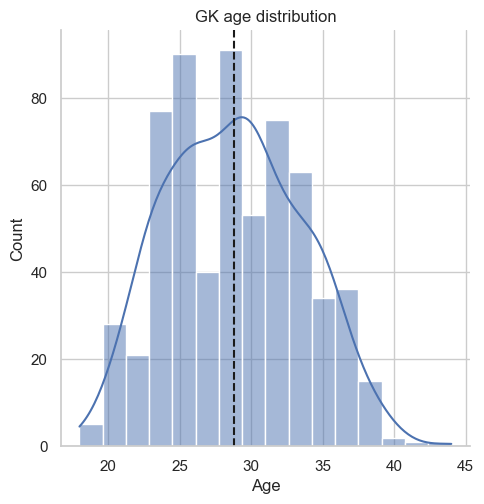

In [111]:
sns.displot(data=GK_df,
           x='Age',
           kde='kde')
ax = plt.gca()
ax.set_title('GK age distribution')
ax.axvline(GK_df['Age'].mean(), color='k',ls='--')
plt.show()

Looking at how age affects GK attributes

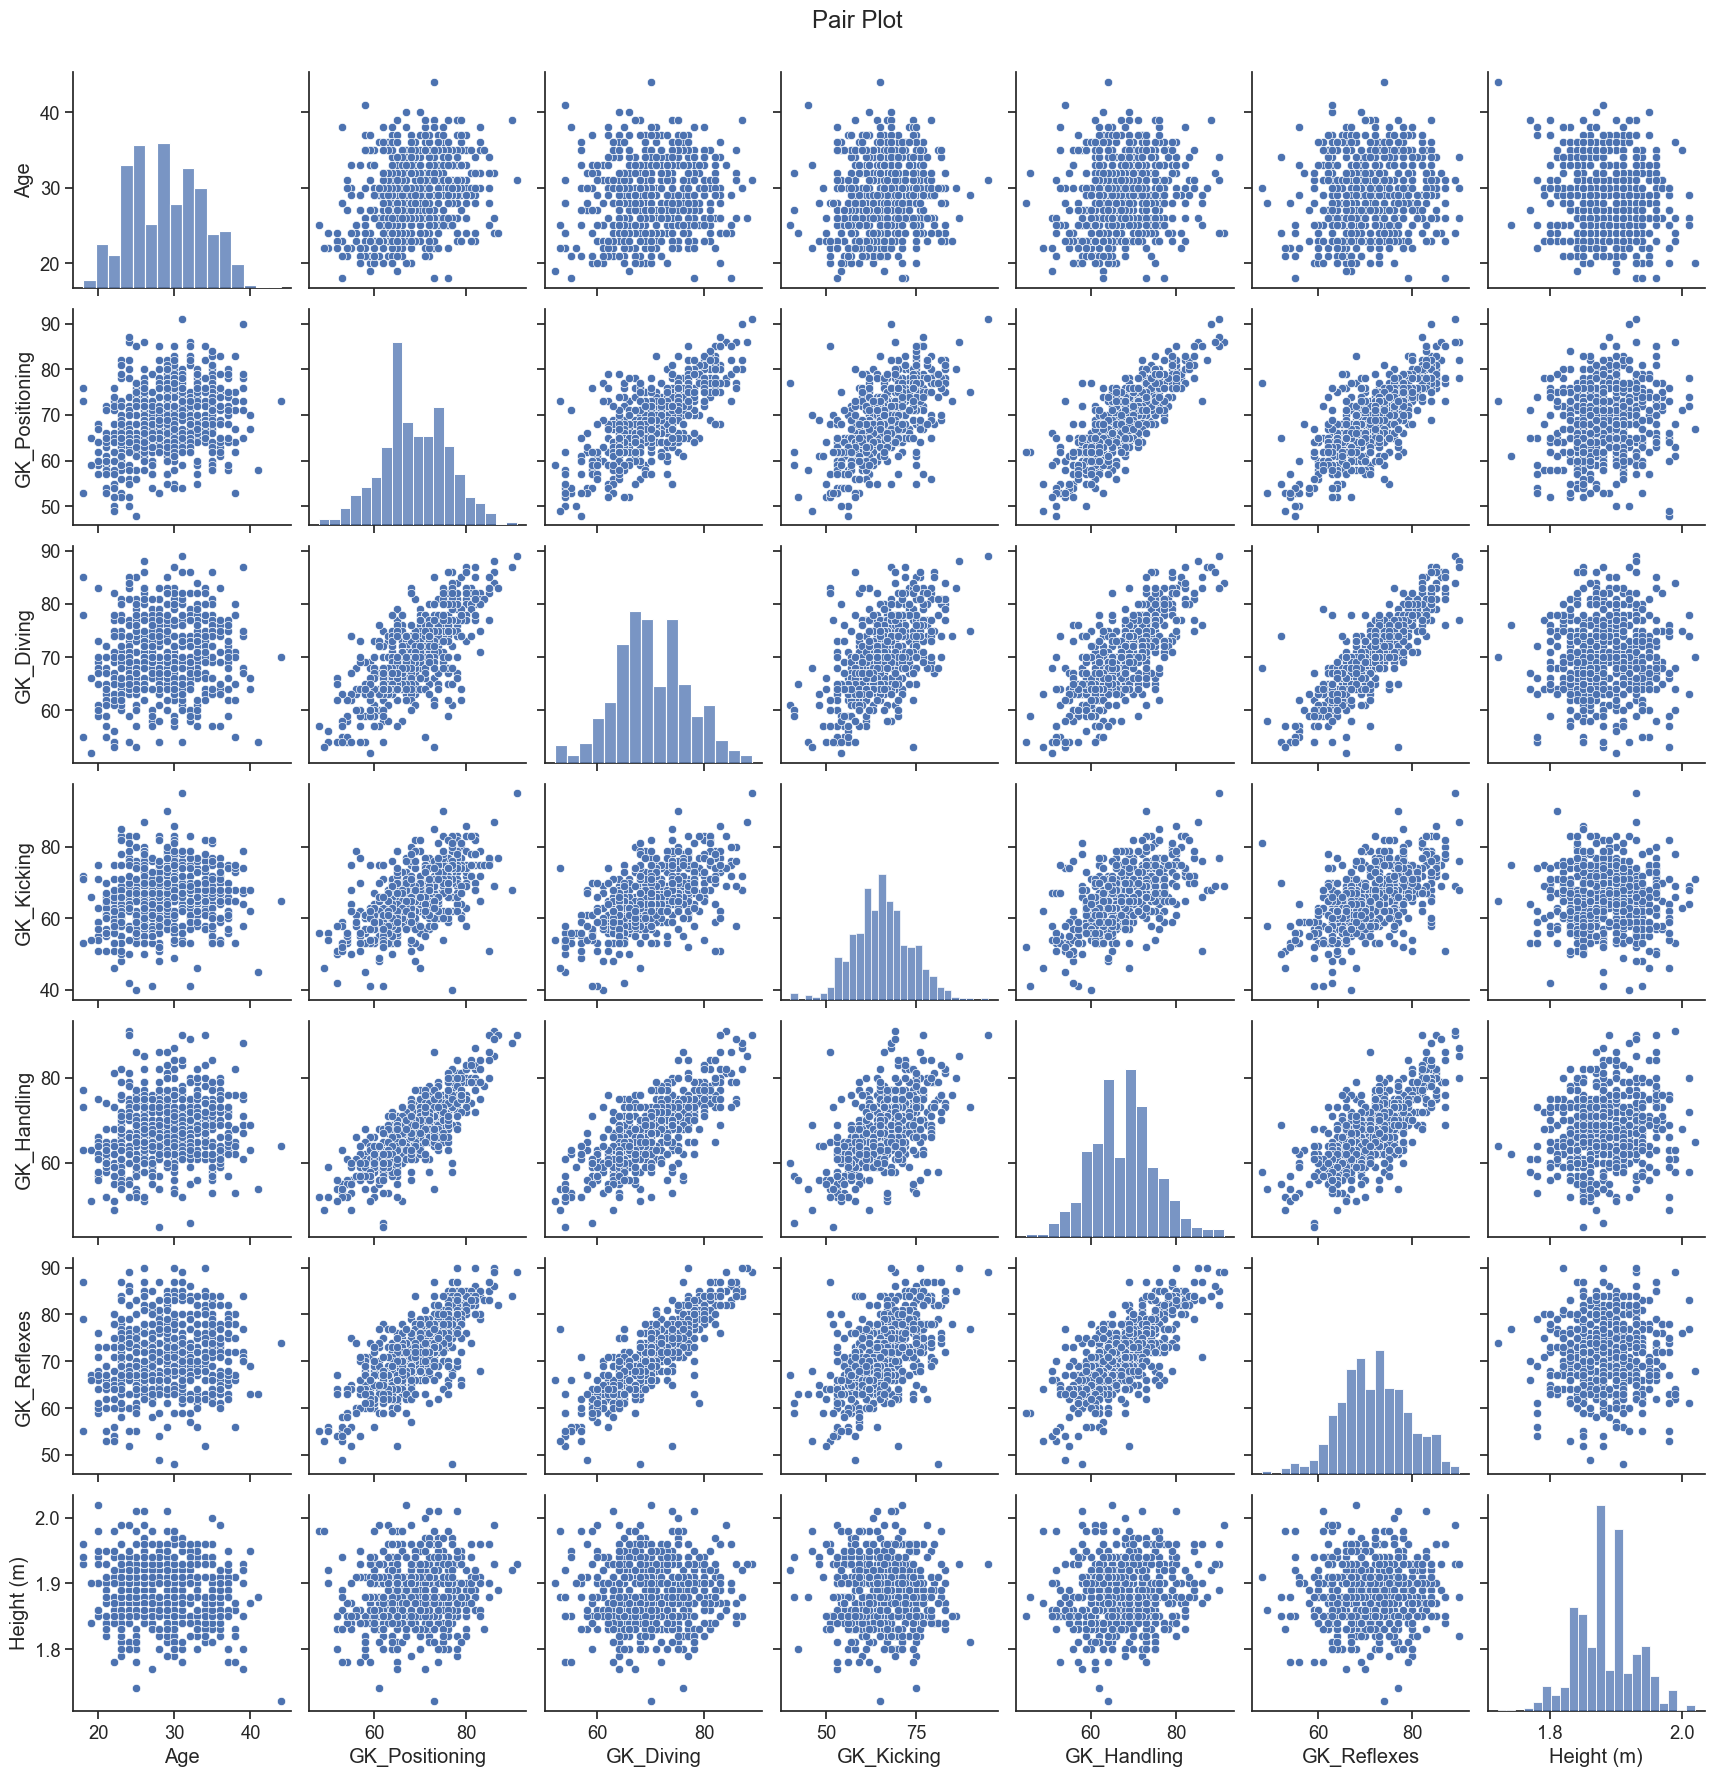

In [112]:
sns.set(style='ticks', font_scale=1.2)

# create a pairplot 
sns.pairplot(GK_df, vars=['Age','GK_Positioning','GK_Diving', 'GK_Kicking', 'GK_Handling', 'GK_Reflexes', 'Height (m)'])
plt.suptitle('Pair Plot', y=1.02)
plt.show()

**Goal Keeper with the highest rating**

In [113]:
#The highest rated GoalKeeper
GK_df.loc[GK_df['Rating'].idxmax()]

Name                 Manuel Neuer
Nationality               Germany
Rating                         92
Height                      193.0
Weight                       92.0
Preffered_Foot              Right
Age                            31
Work_Rate         Medium / Medium
Weak_foot                       4
Ball_Control                   48
Aggression                     29
Reactions                      85
Vision                         70
Composure                      70
Short_Pass                     55
Long_Pass                      59
Acceleration                   58
Stamina                        44
Strength                       83
Balance                        35
Agility                        52
Jumping                        78
Curve                          14
Volleys                        11
GK_Positioning                 91
GK_Diving                      89
GK_Kicking                     95
GK_Handling                    90
GK_Reflexes                    89
Height (m)    

**Goal Keeper with the lowest rating**

In [114]:
#The highest rated GoalKeeper
GK_df.loc[GK_df['Rating'].idxmin()]['Name']

'Matt Macey'

**We'll compare between the lowest and highly rated GK, the most important thing is how the attributes are distributed**

In [115]:
numeric_df = GK_df[['Rating','Age','GK_Positioning','GK_Diving',
                    'GK_Kicking', 'GK_Handling', 'GK_Reflexes',
                    'Ball_Control','Composure','Agility',
                   'Jumping','BMI','Short_Pass', 'Long_Pass']]

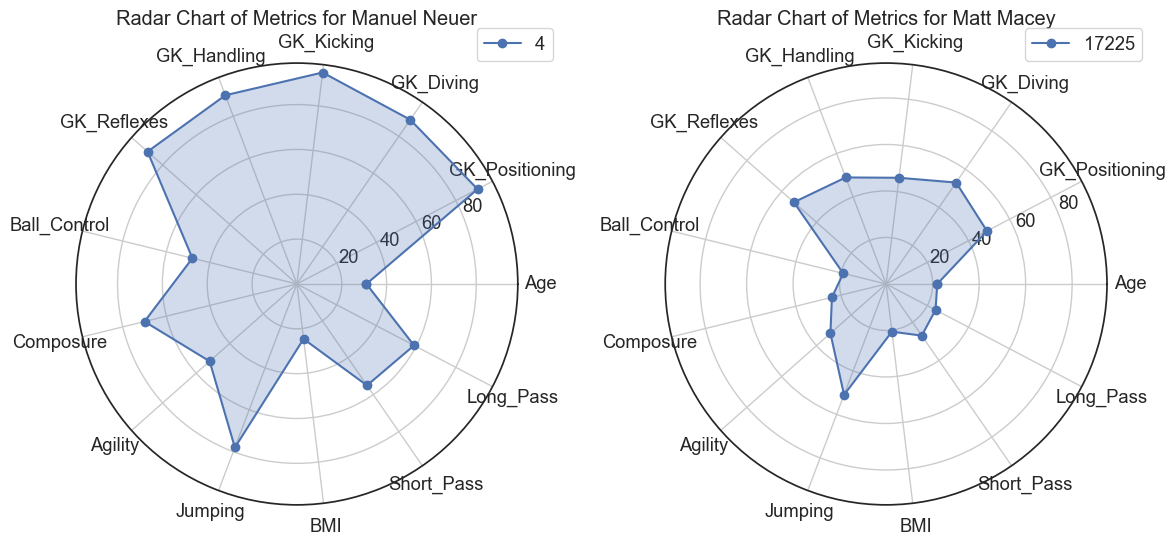

In [116]:
# Find the player with the highest rating
highest_rated_player_name = numeric_df['Rating'].idxmax() 
highest_rated_player_metrics = numeric_df.loc[highest_rated_player_name, :].drop('Rating')
player_name_highest = GK_df.loc[GK_df['Rating'].idxmax()]['Name']

# Find the player with the lowest rating
lowest_rated_player_name = numeric_df['Rating'].idxmin()
lowest_rated_player_metrics = numeric_df.loc[lowest_rated_player_name, :].drop('Rating')
player_name_lowest = GK_df.loc[GK_df['Rating'].idxmin()]['Name']

# Calculate the maximum value among metrics for both players
max_metric_value = max(highest_rated_player_metrics.max(), lowest_rated_player_metrics.max())

# Number of metrics
num_metrics = len(highest_rated_player_metrics)

# Calculate angles for each axis
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False)

# Closing the radar plot
angles = np.concatenate((angles, [angles[0]]))

# Creating the plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Plot the metrics for the highest rated player
plt.subplot(121, polar=True)
plt.plot(angles, highest_rated_player_metrics.tolist() + [highest_rated_player_metrics.iloc[0]], marker='o', label=highest_rated_player_name)
plt.fill(angles, highest_rated_player_metrics.tolist() + [highest_rated_player_metrics.iloc[0]], alpha=0.25)

# Set the labels for each axis
plt.xticks(angles[:-1], highest_rated_player_metrics.index)
plt.title(f'Radar Chart of Metrics for {player_name_highest}')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Plot the metrics for the lowest rated player
plt.subplot(122, polar=True)
plt.plot(angles, lowest_rated_player_metrics.tolist() + [lowest_rated_player_metrics.iloc[0]], marker='o', label=lowest_rated_player_name)
plt.fill(angles, lowest_rated_player_metrics.tolist() + [lowest_rated_player_metrics.iloc[0]], alpha=0.25)

# Set the labels for each axis
plt.xticks(angles[:-1], lowest_rated_player_metrics.index)
plt.title(f'Radar Chart of Metrics for {player_name_lowest}')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))


# Set the same y-axis limit for both subplots
plt.ylim(0, max_metric_value)

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

The above graphs show how the GK attributes are distributed between a highly and least rated GK.  
We are going to create an additional graph with a GK with a mean rating and see how it is different from these two.

In [117]:
# calculating the mean
mean_rating = numeric_df['Rating'].mean()
mean_age= numeric_df['Age'].mean()
print('The average Gk rating is ', round(mean_rating))
print('The average Gk age is ', round(mean_age))

The average Gk rating is  70
The average Gk age is  29


In [118]:
numeric_df[(numeric_df['Rating'] == 70) & (numeric_df['Age'] == 29)].head(1)

Rating  Age  GK_Positioning  GK_Diving  GK_Kicking  GK_Handling  \
4655      70   29              70         69          66           69   

      GK_Reflexes  Ball_Control  Composure  Agility  Jumping    BMI  \
4655           76            15         24       32       73  24.59   

      Short_Pass  Long_Pass  
4655          13         16

In [119]:
numeric_df.loc[4655]

Rating            70.00
Age               29.00
GK_Positioning    70.00
GK_Diving         69.00
GK_Kicking        66.00
GK_Handling       69.00
GK_Reflexes       76.00
Ball_Control      15.00
Composure         24.00
Agility           32.00
Jumping           73.00
BMI               24.59
Short_Pass        13.00
Long_Pass         16.00
Name: 4655, dtype: float64

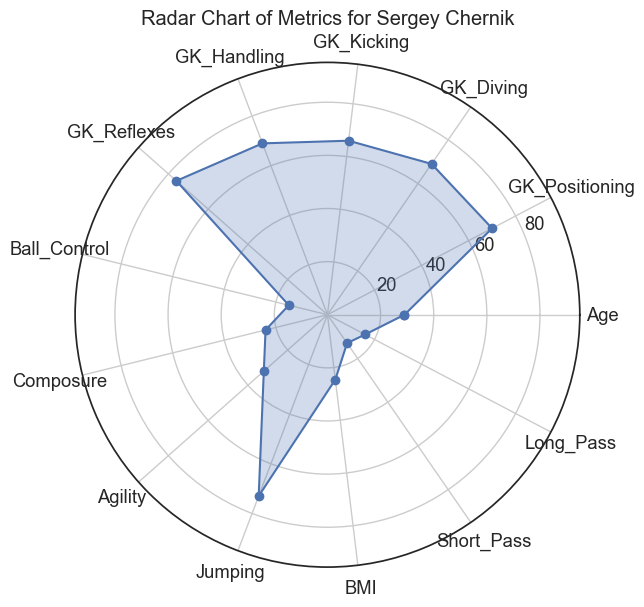

In [120]:
'''
We should multiple players with the average rating and age,
the best Gk to visualise their attributes would be a player with the average age and rating.
'''

# Find the player with the average rating
average_rated_player_name = 4655
average_rated_player_metrics = numeric_df.loc[average_rated_player_name, :].drop('Rating')
player_name_average = GK_df.loc[4655]['Name']

# Calculate the maximum value among metrics for both players
max_metric_value = max(highest_rated_player_metrics.max(),
                       lowest_rated_player_metrics.max())

# Number of metrics
num_metrics = len(highest_rated_player_metrics)

# Calculate angles for each axis
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False)

# Closing the radar plot
angles = np.concatenate((angles, [angles[0]]))

# Creating the plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Plot the metrics for the highest rated player
plt.subplot(121, polar=True)
plt.plot(angles, average_rated_player_metrics.tolist()
         + [average_rated_player_metrics.iloc[0]], marker='o',
         label=highest_rated_player_name)

plt.fill(angles, average_rated_player_metrics.tolist() +
         [average_rated_player_metrics.iloc[0]], alpha=0.25)

# Set the labels for each axis
plt.xticks(angles[:-1], average_rated_player_metrics.index)
plt.title(f'Radar Chart of Metrics for {player_name_average}')
#plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Set the same y-axis limit for both subplots
plt.ylim(0, max_metric_value)

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

We have analyzed there players:  
1. Manuel Neuer  
2. Matt Macey  
3. Sergey Chernik  
  
  These are the highest, average and lowest rated gk. These three graphs shows the distribution of attributes for these difference goal keepers. They will allow us to define what a good GK is.

### 2. Defenders

In [121]:
df.columns

Index(['Name', 'Nationality', 'Club', 'Club_Position', 'Club_Kit',
       'Club_Joining', 'Contract_Expiry', 'Rating', 'Height', 'Weight',
       'Preffered_Foot', 'Birth_Date', 'Age', 'Preffered_Position',
       'Work_Rate', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling',
       'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression',
       'Reactions', 'Attacking_Position', 'Interceptions', 'Vision',
       'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration',
       'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
       'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
       'Freekick_Accuracy', 'Penalties', 'Volleys', 'GK_Positioning',
       'GK_Diving', 'GK_Kicking', 'GK_Handling', 'GK_Reflexes', 'Height (m)',
       'BMI', 'Positions'],
      dtype='object')

In [122]:
def_df = df[df['Positions'] == 'Defender']
def_df = def_df[['Name', 'Club_Position',
                 'Rating', 'Height', 'Preffered_Foot', 'Age', 'Preffered_Position',
                 'Work_Rate', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling',
                 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression',
                 'Reactions', 'Attacking_Position', 'Interceptions', 'Vision',
                 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration',
                 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
                 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
                 'Freekick_Accuracy', 'Penalties', 'Volleys', 'Height (m)',
                 'BMI', 'Positions']]
def_df.head()

Name Club_Position  Rating  Height Preffered_Foot  Age  \
15       Thiago Silva           LCB      89   183.0          Right   32   
16       Sergio Ramos           LCB      89   183.0          Right   31   
24        Diego Godín           LCB      88   185.0          Right   31   
25       Mats Hummels           LCB      88   191.0          Right   28   
27  Giorgio Chiellini           LCB      88   187.0           Left   32   

   Preffered_Position      Work_Rate  Weak_foot  Skill_Moves  ...  Shot_Power  \
15                 CB    High / High          3            3  ...          78   
16                 CB  High / Medium          3            3  ...          79   
24                 CB  Medium / High          3            2  ...          67   
25                 CB  High / Medium          3            2  ...          71   
27                 CB     Low / High          2            2  ...          78   

    Finishing  Long_Shots  Curve  Freekick_Accuracy  Penalties  Volleys  \
15         38          71     61                 73         71       63   
16         60          55     73                 67         68       66   
24         42          43     49                 51         50       47   
25         55          51     65                 53         68       60   
27         33          49     60                 31         50       45   

    Height (m)    BMI  Positions  
15        1.83  23.59   Defender  
16        1.83  22.40   Defender  
24        1.85  21.33   Defender  
25        1.91  25.22   Defender  
27        1.87  24.02   Defender  

[5 rows x 42 columns]

In [123]:
def_df.describe()

Rating       Height          Age    Weak_foot  Skill_Moves  \
count  2534.000000  2534.000000  2534.000000  2534.000000  2534.000000   
mean     68.732044   182.623520    26.938043     2.842541     2.123520   
std       5.989564     6.110473     4.093811     0.610532     0.338559   
min      49.000000   161.000000    18.000000     1.000000     2.000000   
25%      65.000000   178.000000    24.000000     2.000000     2.000000   
50%      69.000000   183.000000    27.000000     3.000000     2.000000   
75%      72.000000   187.000000    30.000000     3.000000     2.000000   
max      89.000000   199.000000    39.000000     5.000000     4.000000   

       Ball_Control    Dribbling      Marking  Sliding_Tackle  \
count   2534.000000  2534.000000  2534.000000     2534.000000   
mean      59.636543    53.398185    66.851618       67.432912   
std        9.757831    13.485955     7.735976        7.460386   
min       25.000000    14.000000    23.000000       25.000000   
25%       54.000000    44.000000    62.000000       63.000000   
50%       61.000000    56.000000    67.000000       67.000000   
75%       66.000000    64.000000    72.000000       72.000000   
max       87.000000    84.000000    92.000000       95.000000   

       Standing_Tackle  ...      Heading   Shot_Power    Finishing  \
count      2534.000000  ...  2534.000000  2534.000000  2534.000000   
mean         68.893054  ...    63.192976    54.875691    36.498816   
std           7.173888  ...    10.107528    14.563173    12.396934   
min          22.000000  ...    25.000000    12.000000    10.000000   
25%          64.000000  ...    57.000000    44.000000    27.000000   
50%          69.000000  ...    64.000000    56.000000    35.000000   
75%          74.000000  ...    70.000000    66.000000    45.000000   
max          92.000000  ...    92.000000    89.000000    73.000000   

        Long_Shots        Curve  Freekick_Accuracy    Penalties      Volleys  \
count  2534.000000  2534.000000        2534.000000  2534.000000  2534.000000   
mean     42.773481    45.623520          41.534333    45.276243    37.470008   
std      15.472043    15.660997          14.874850    11.765115    12.713013   
min      11.000000    11.000000          10.000000    11.000000    11.000000   
25%      30.000000    33.000000          30.000000    37.000000    28.000000   
50%      42.000000    44.000000          39.000000    44.000000    35.000000   
75%      55.000000    58.000000          52.000000    53.000000    46.000000   
max      88.000000    86.000000          87.000000    90.000000    80.000000   

        Height (m)          BMI  
count  2534.000000  2534.000000  
mean      1.826235    23.080067  
std       0.061105     1.314511  
min       1.610000    17.180000  
25%       1.780000    22.222500  
50%       1.830000    23.080000  
75%       1.870000    23.890000  
max       1.990000    29.630000  

[8 rows x 36 columns]

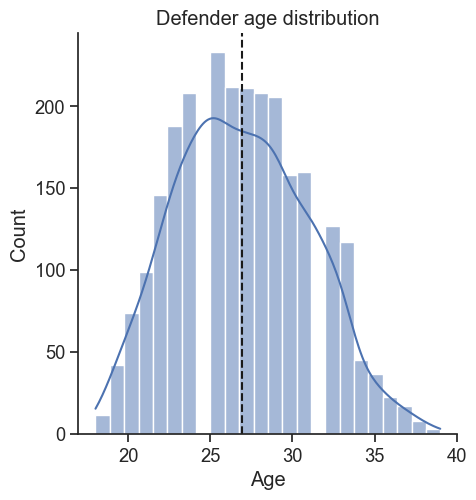

In [124]:
sns.displot(data=def_df,
           x='Age',
           kde='kde')
ax = plt.gca()
ax.set_title('Defender age distribution')
ax.axvline(def_df['Age'].mean(), color='k',ls='--')
plt.show()

In [125]:
def_df.columns

Index(['Name', 'Club_Position', 'Rating', 'Height', 'Preffered_Foot', 'Age',
       'Preffered_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'Height (m)', 'BMI', 'Positions'],
      dtype='object')

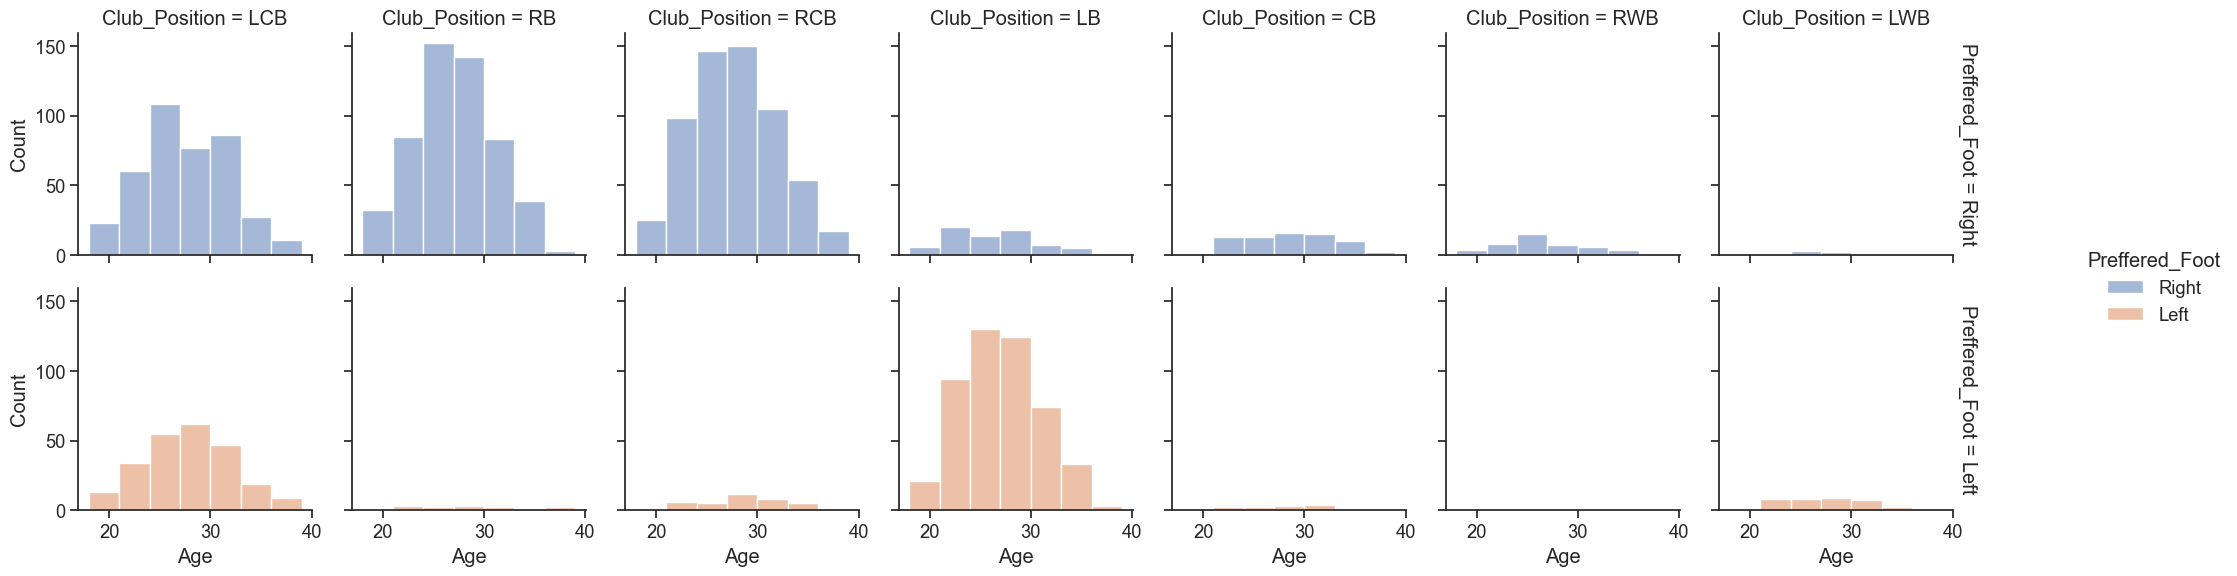

In [126]:
sns.set(style='ticks', font_scale=1.2)

# create a pairplot
sns.displot(
    def_df, x="Age", col="Club_Position", row="Preffered_Foot", hue='Preffered_Foot',
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

Due to the shortage of left footed defenders, we see can see that there are more right footed centre backs in the LCB position that left footed LCB.  
This is something a team can look out for when searching for a player. They will have less chances of getting a left-footed centre back in the market. 

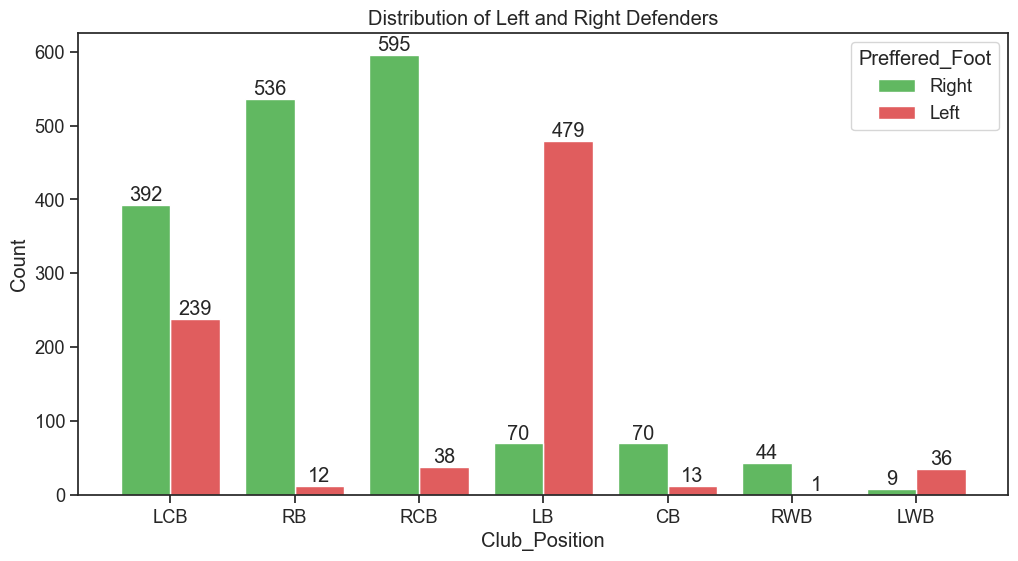

In [127]:
'''
Creating a similar graph as the one above but now directly comparing the left and right footed players.
'''
fig, ax1 = plt.subplots(figsize=(12,6))

# creating a pallete dict for the different colours
palette = {
    'Right': 'tab:green',
    'Left': 'tab:red',
}


ax = sns.histplot(data=def_df, x="Club_Position",
             hue="Preffered_Foot", multiple="dodge", palette=palette, shrink=.8)

# label the x-values
for container in ax.containers: 
    ax.bar_label(container)


ax = plt.gca()
ax.set_title('Distribution of Left and Right Defenders')
plt.show()

In [128]:
vital_def_attributes = def_df[['Rating', 'Age',
                                'Ball_Control', 'Marking', 'Sliding_Tackle',
                                'Standing_Tackle', 'Aggression', 'Reactions',
                                'Interceptions', 'Vision', 'Composure', 'Short_Pass',
                                'Long_Pass', 'Acceleration', 'Stamina', 'Strength',
                                'Agility', 'Jumping', 'Heading']]

In [129]:
vital_def_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2534 entries, 15 to 17481
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Rating           2534 non-null   int64
 1   Age              2534 non-null   int64
 2   Ball_Control     2534 non-null   int64
 3   Marking          2534 non-null   int64
 4   Sliding_Tackle   2534 non-null   int64
 5   Standing_Tackle  2534 non-null   int64
 6   Aggression       2534 non-null   int64
 7   Reactions        2534 non-null   int64
 8   Interceptions    2534 non-null   int64
 9   Vision           2534 non-null   int64
 10  Composure        2534 non-null   int64
 11  Short_Pass       2534 non-null   int64
 12  Long_Pass        2534 non-null   int64
 13  Acceleration     2534 non-null   int64
 14  Stamina          2534 non-null   int64
 15  Strength         2534 non-null   int64
 16  Agility          2534 non-null   int64
 17  Jumping          2534 non-null   int64
 18  Heading    

In [130]:
def_df.loc[def_df['Rating'].idxmax()]['Name'] # Highly rated defender is Thiago Silva

'Thiago Silva'

In [131]:
def_df.loc[def_df['Rating'].idxmin()]['Name'] # Least rated defender is Simon Trier

'Simon Trier'

<Figure size 1200x600 with 0 Axes>

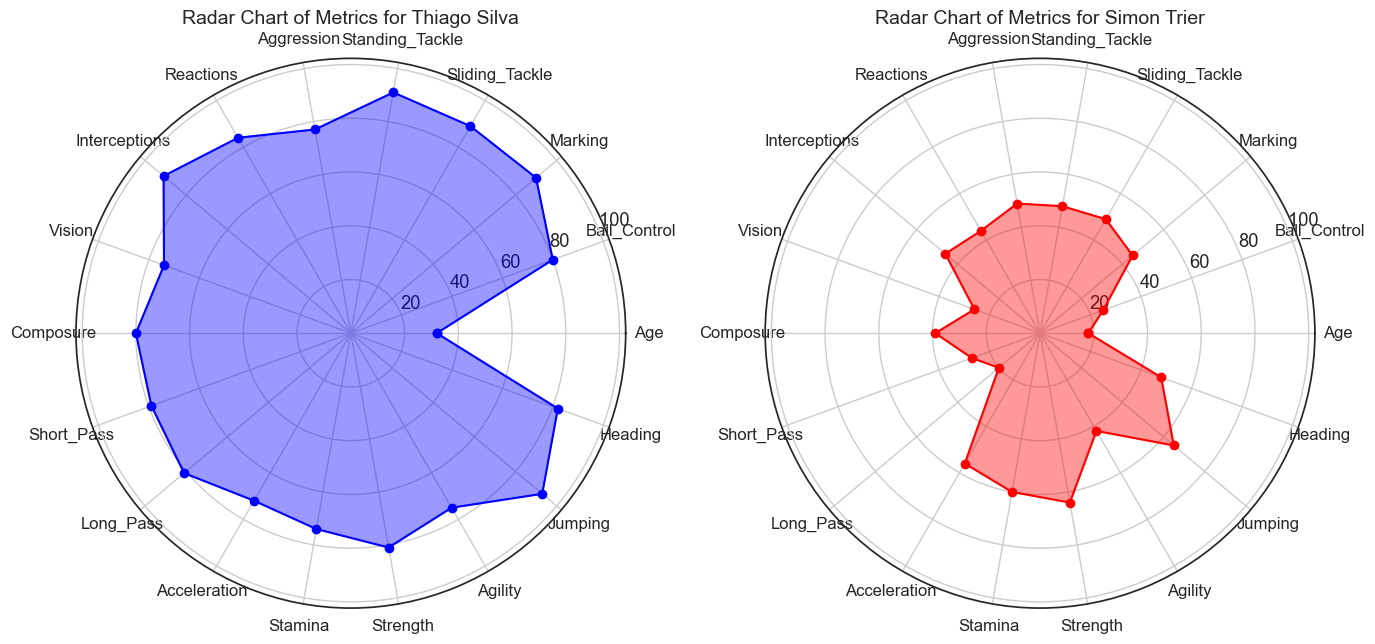

In [132]:
# Find the player with the highest rating
highest_rated_def_name = vital_def_attributes['Rating'].idxmax() 
highest_rated_def_metrics = vital_def_attributes.loc[highest_rated_def_name, :].drop('Rating')
player_name_highest = def_df.loc[def_df['Rating'].idxmax()]['Name']

# Find the player with the lowest rating
lowest_rated_def_name = vital_def_attributes['Rating'].idxmin()
lowest_rated_def_metrics = vital_def_attributes.loc[lowest_rated_def_name, :].drop('Rating')
player_name_lowest = def_df.loc[def_df['Rating'].idxmin()]['Name']

# Calculate the maximum value among metrics for both players
max_metric_value = max(highest_rated_def_metrics.max(), lowest_rated_def_metrics.max())

# Number of metrics
num_metrics = len(highest_rated_def_metrics)

# Calculate angles for each axis
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False)

# Closing the radar plot
angles = np.concatenate((angles, [angles[0]]))

# Creating the plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), subplot_kw=dict(polar=True))

# Set custom colors for the lines and fill areas
colors = ['blue', 'red', 'yellow']

# Plot the metrics for the highest rated player
ax1.plot(angles, highest_rated_def_metrics.tolist() + [highest_rated_def_metrics.iloc[0]], marker='o', label=highest_rated_def_name, color=colors[0])
ax1.fill(angles, highest_rated_def_metrics.tolist() + [highest_rated_def_metrics.iloc[0]], alpha=0.4, color=colors[0])

# Set the labels for each axis and adjust font size
ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(highest_rated_def_metrics.index, fontsize=12)
ax1.set_title(f'Radar Chart of Metrics for {player_name_highest}', fontsize=14)
# ax1.legend(loc='upper left')

# Plot the metrics for the lowest rated player
ax2.plot(angles, lowest_rated_def_metrics.tolist() + [lowest_rated_def_metrics.iloc[0]], marker='o', label=lowest_rated_def_name, color=colors[1])
ax2.fill(angles, lowest_rated_def_metrics.tolist() + [lowest_rated_def_metrics.iloc[0]], alpha=0.4, color=colors[1])

# Set the labels for each axis and adjust font size
ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(lowest_rated_def_metrics.index, fontsize=12)
ax2.set_title(f'Radar Chart of Metrics for {player_name_lowest}', fontsize=14)
# ax2.legend(loc='upper left')

# Set the same y-axis limit for both subplots (slightly above max_metric_value)
y_max = max_metric_value * 1.1
ax1.set_ylim(0, y_max)
ax2.set_ylim(0, y_max)

# Add grid lines
ax1.grid(True)
ax2.grid(True)

# Tight layout for proper spacing
plt.tight_layout()

# Show the plot
plt.show()

The above graphs show the different attributes between a highly rated defender `Thiago Silva` and Least rated defender `Simon Trier`. One thing to note, Simon is a very young player whilst Thiago Silva is a seasoned defender. The rader chart of Simon can still grow as he gains experience.  
  
  Just like we did with the goal keepers, we are now going to show how these attributes are distributed in a defender with average rating and age.

**Average Defender**

In [133]:
mean_rating = vital_def_attributes['Rating'].mean()
mean_age= vital_def_attributes['Age'].mean()
print('The average defender rating is ', round(mean_rating))
print('The average defender age is ', round(mean_age))

The average defender rating is  69
The average defender age is  27


In [134]:
# def_df[(def_df['Rating'] == 69) & (def_df['Age'] == 27)] #6029

<Figure size 1200x600 with 0 Axes>

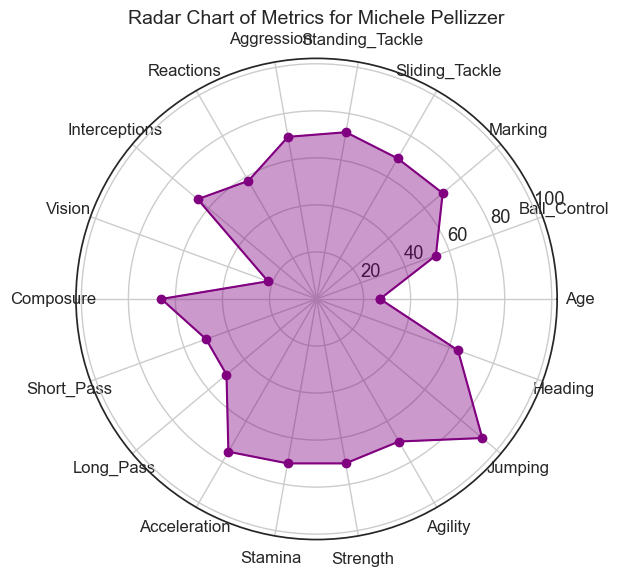

In [135]:
'''
We should multiple players with the average rating and age,
the best Gk to visualise their attributes would be a player with the average age and rating.
'''

# Find the player with the average rating
average_rated_def_name = 6029
average_rated_def_metrics = vital_def_attributes.loc[average_rated_def_name, :].drop('Rating')
player_name_average = def_df.loc[6029]['Name']

# Calculate the maximum value among metrics for both players
max_metric_value = max(highest_rated_def_metrics.max(),
                       lowest_rated_def_metrics.max())

# Number of metrics
num_metrics = len(highest_rated_def_metrics)

# Calculate angles for each axis
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False)

# Closing the radar plot
angles = np.concatenate((angles, [angles[0]]))

# Creating the plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True))

# Set custom colors for the radar lines and fill areas
colors = ['blue', 'green', 'yellow']

# Plot the metrics for the average-rated player
ax.plot(angles, average_rated_def_metrics.tolist() + [average_rated_def_metrics.iloc[0]], marker='o', label=player_name_average, color='purple')
ax.fill(angles, average_rated_def_metrics.tolist() + [average_rated_def_metrics.iloc[0]], alpha=0.4, color='purple')

# Set the labels for each axis and adjust font size
ax.set_xticks(angles[:-1])
ax.set_xticklabels(average_rated_def_metrics.index, fontsize=12)
ax.set_title(f'Radar Chart of Metrics for {player_name_average}', fontsize=14)
# ax.legend(loc='upper right')

# Set the y-axis limit (slightly above max_metric_value)
y_max = max_metric_value * 1.1
ax.set_ylim(0, y_max)

# Add grid lines
ax.grid(True)

# Tight layout for proper spacing
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1600x800 with 0 Axes>

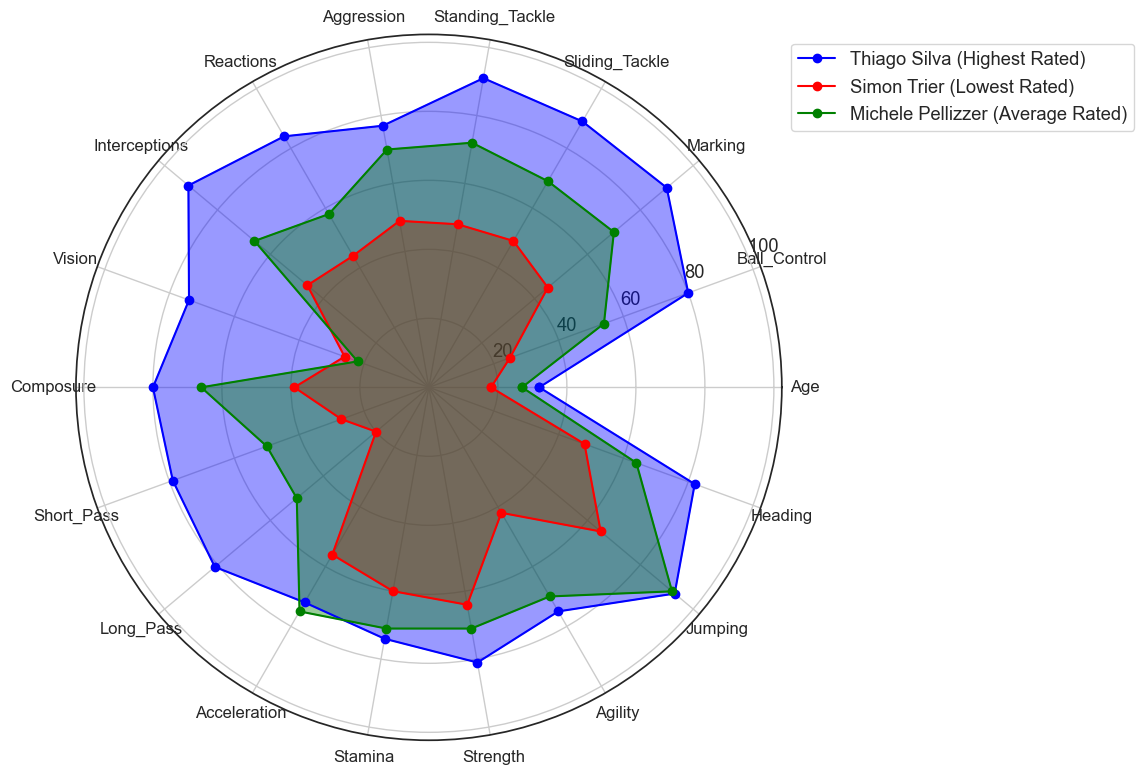

In [136]:
# Create the figure and subplot for the combined radar chart
plt.figure(figsize=(16, 8))  # Adjust figure size as needed
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(polar=True))

# Set custom colors for the radar lines and fill areas
colors = ['blue', 'red', 'yellow', 'green']

# Plot the metrics for the highest-rated player
ax.plot(angles, highest_rated_def_metrics.tolist() + [highest_rated_def_metrics.iloc[0]], marker='o', label=f'{player_name_highest} (Highest Rated)', color=colors[0])
ax.fill(angles, highest_rated_def_metrics.tolist() + [highest_rated_def_metrics.iloc[0]], alpha=0.4, color=colors[0])

# Plot the metrics for the lowest-rated player
ax.plot(angles, lowest_rated_def_metrics.tolist() + [lowest_rated_def_metrics.iloc[0]], marker='o', label=f'{player_name_lowest} (Lowest Rated)', color=colors[1])
ax.fill(angles, lowest_rated_def_metrics.tolist() + [lowest_rated_def_metrics.iloc[0]], alpha=0.4, color=colors[1])

# Plot the metrics for the average-rated player
ax.plot(angles, average_rated_def_metrics.tolist() + [average_rated_def_metrics.iloc[0]], marker='o', label=f'{player_name_average} (Average Rated)', color=colors[3])
ax.fill(angles, average_rated_def_metrics.tolist() + [average_rated_def_metrics.iloc[0]], alpha=0.4, color=colors[3])

# Set the labels for each axis and adjust font size
ax.set_xticks(angles[:-1])
ax.set_xticklabels(highest_rated_def_metrics.index, fontsize=12)
#ax.set_title(f'Radar Chart of Metrics for {player_name_highest}, {player_name_lowest}, and {player_name_average}', fontsize=14)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust the legend location as needed

# Set the y-axis limit (slightly above max_metric_value)
y_max = max_metric_value * 1.1
ax.set_ylim(0, y_max)

# Add grid lines
ax.grid(True)

# Tight layout for proper spacing
plt.tight_layout()

# Show the pldot
plt.show()

Now we can see how all the different players compare against each other. A highly rated player casts a wider web, whilst the least rated player has a smallest web. Another notable attributes with Simon, he is the youngest of the three player. Michelle is the average player.

In [137]:
def_df.columns

Index(['Name', 'Club_Position', 'Rating', 'Height', 'Preffered_Foot', 'Age',
       'Preffered_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'Height (m)', 'BMI', 'Positions'],
      dtype='object')

In [138]:
def_corr = def_df[['Rating', 'Height', 'Age',
        'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'Height (m)']]

<Axes: >

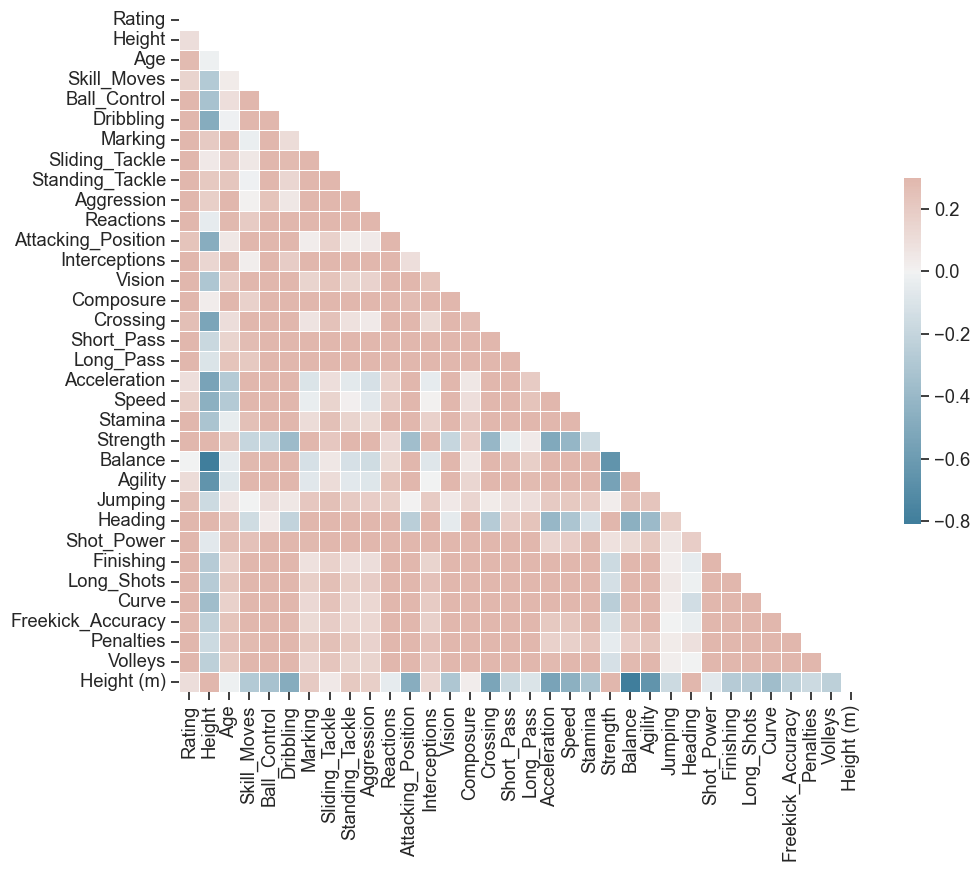

In [139]:
# calculate the correlation in the football attributes
corr = def_corr.corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ration
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

### 3. Midfielders

In [140]:
df['Positions'].head()

0     Midfielder
1     Midfielder
2     Midfielder
3        Reserve
4    Goal Keeper
Name: Positions, dtype: object

In [141]:
mid_df = df[df['Positions'] == 'Midfielder']
mid_df.head()

Name Nationality          Club Club_Position  Club_Kit  \
0   Cristiano Ronaldo    Portugal   Real Madrid            LW       7.0   
1        Lionel Messi   Argentina  FC Barcelona            RW      10.0   
2              Neymar      Brazil  FC Barcelona            LW      11.0   
7         Gareth Bale       Wales   Real Madrid            RW      11.0   
11        Eden Hazard     Belgium       Chelsea            LW      10.0   

   Club_Joining  Contract_Expiry  Rating  Height  Weight  ... Penalties  \
0    07/01/2009           2021.0      94   185.0    80.0  ...        85   
1    07/01/2004           2018.0      93   170.0    72.0  ...        74   
2    07/01/2013           2021.0      92   174.0    68.0  ...        81   
7    09/02/2013           2022.0      90   183.0    74.0  ...        76   
11   07/01/2012           2020.0      89   173.0    74.0  ...        86   

   Volleys  GK_Positioning GK_Diving GK_Kicking  GK_Handling  GK_Reflexes  \
0       88              14         7         15           11           11   
1       85              14         6         15           11            8   
2       83              15         9         15            9           11   
7       76               5        15         11           15            6   
11      79               8        11          6           12            8   

    Height (m)    BMI   Positions  
0         1.85  23.37  Midfielder  
1         1.70  24.91  Midfielder  
2         1.74  22.46  Midfielder  
7         1.83  22.10  Midfielder  
11        1.73  24.73  Midfielder  

[5 rows x 54 columns]

In [142]:
# columns
mid_df.columns

Index(['Name', 'Nationality', 'Club', 'Club_Position', 'Club_Kit',
       'Club_Joining', 'Contract_Expiry', 'Rating', 'Height', 'Weight',
       'Preffered_Foot', 'Birth_Date', 'Age', 'Preffered_Position',
       'Work_Rate', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling',
       'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression',
       'Reactions', 'Attacking_Position', 'Interceptions', 'Vision',
       'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration',
       'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
       'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
       'Freekick_Accuracy', 'Penalties', 'Volleys', 'GK_Positioning',
       'GK_Diving', 'GK_Kicking', 'GK_Handling', 'GK_Reflexes', 'Height (m)',
       'BMI', 'Positions'],
      dtype='object')

In [143]:
mid_df['Club_Position'].unique()

array(['LW', 'RW', 'RCM', 'CAM', 'LCM', 'LM', 'LDM', 'RM', 'CDM', 'RDM',
       'CM', 'RAM'], dtype=object)

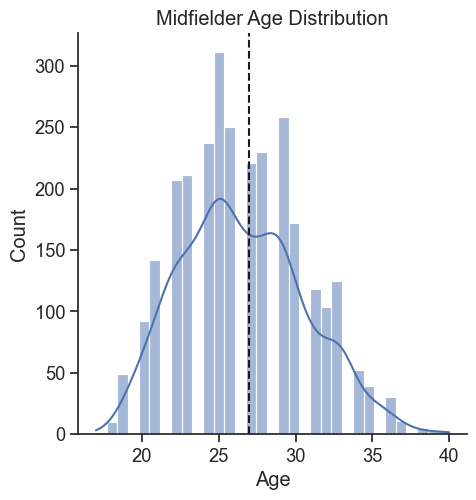

In [144]:
sns.displot(data=mid_df,
           x='Age',
           kde='kde')
ax = plt.gca()
ax.set_title('Midfielder Age Distribution')
ax.axvline(def_df['Age'].mean(), color='k',ls='--')
plt.show()

In [145]:
'''
Breaking the midfield positions into two groups so that it is easier to visualize
'''
subset_df1 = mid_df[mid_df['Club_Position'].isin(['LW', 'RW', 'RCM', 'CAM', 'LCM', 'LM'])] # first batch
subset_df2 = mid_df[mid_df['Club_Position'].isin(['LDM', 'RM','CDM', 'RDM','CM', 'RAM'])] # second batch

**NB: The charts below show the different midfield position and the distribution of each preffered foot per position**

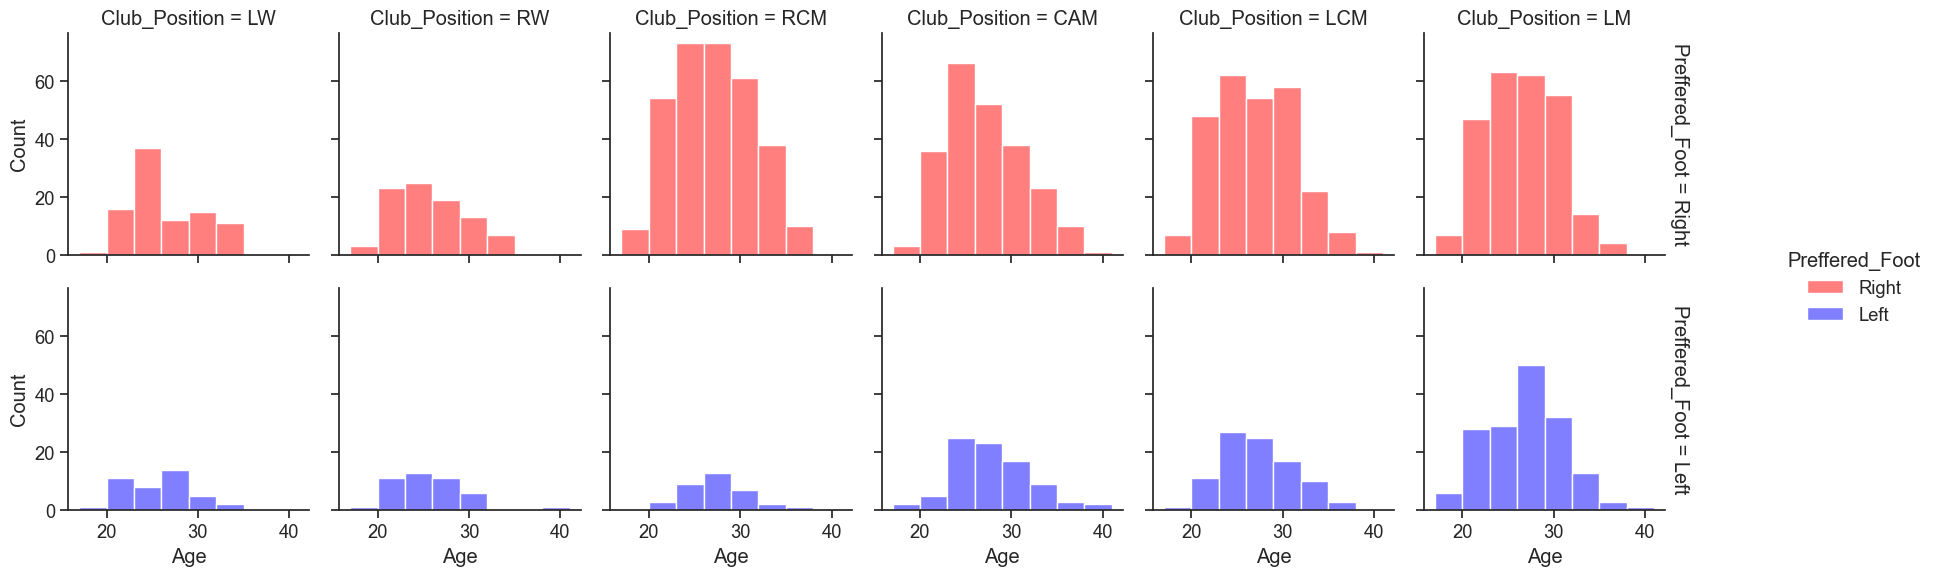

In [146]:
# Define your custom palette with red and blue
custom_palette = ["red", "blue"]

sns.set(style='ticks', font_scale=1.2)

# create a pairplot
sns.displot(subset_df1, x="Age", col="Club_Position", row="Preffered_Foot", hue='Preffered_Foot',
    binwidth=3, height=3, facet_kws=dict(margin_titles=True), palette=custom_palette
)

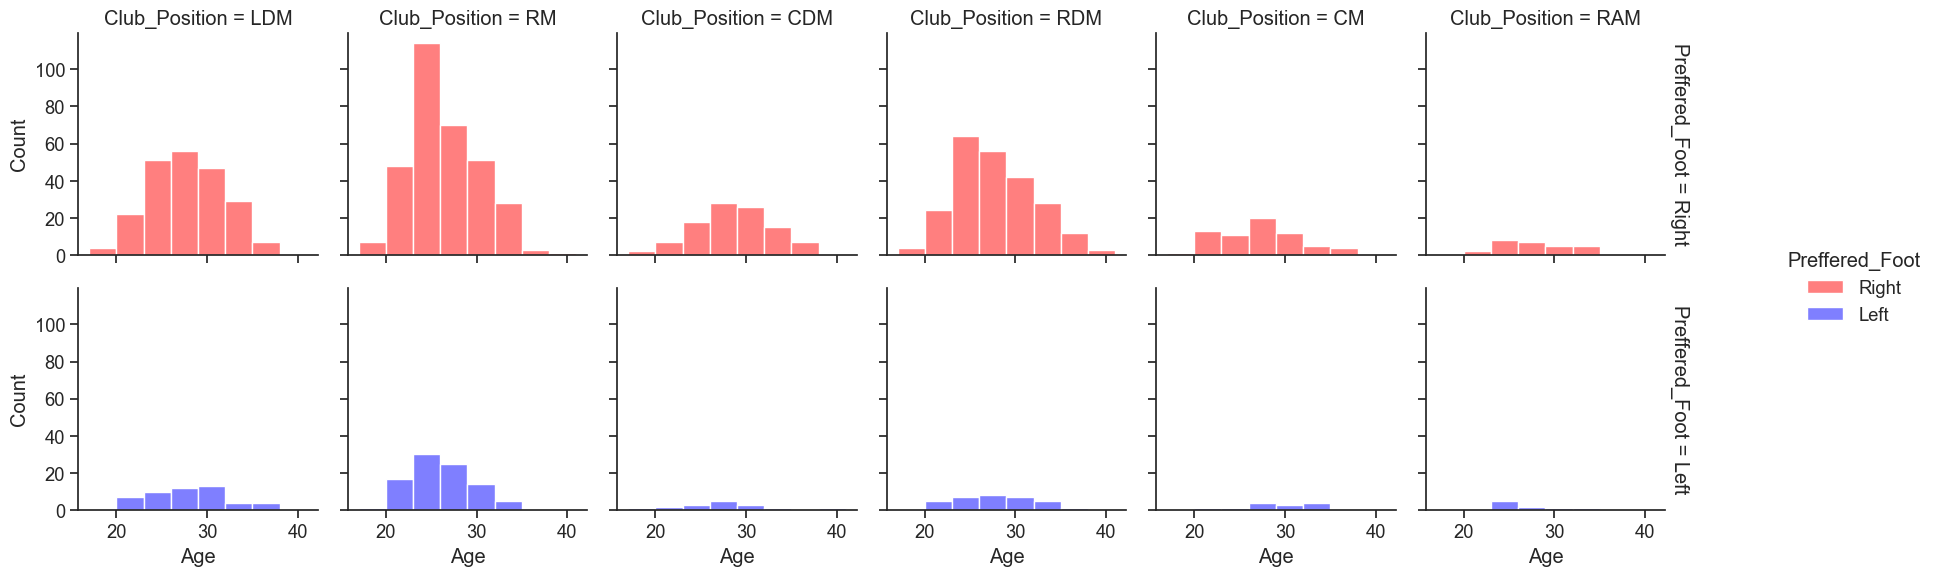

In [147]:
# Define your custom palette with red and blue
custom_palette = ["red", "blue"]

sns.set(style='ticks', font_scale=1.2)

# create a pairplot
sns.displot(subset_df2, x="Age", col="Club_Position", row="Preffered_Foot", hue='Preffered_Foot',
    binwidth=3, height=3, facet_kws=dict(margin_titles=True), palette=custom_palette
)

The distribution of the data depicts a popularity of right footed midfields than left footed in all of the positions.

Now a clear visualization of the ratio between right and left footed players.

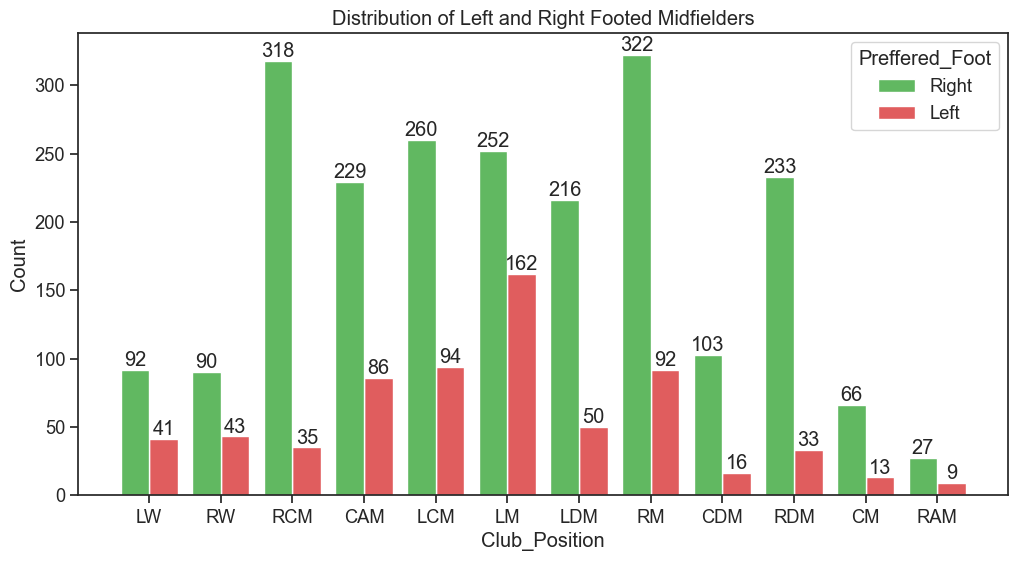

In [148]:
'''
Creating a similar graph as the one above but now directly comparing the left and right footed players.
'''
fig, ax1 = plt.subplots(figsize=(12,6))

# creating a pallete dict for the different colours
palette = {
    'Right': 'tab:green',
    'Left': 'tab:red',
}


ax = sns.histplot(data=mid_df, x="Club_Position",
             hue="Preffered_Foot", multiple="dodge", palette=palette, shrink=.8)

# label the x-values
for container in ax.containers: 
    ax.bar_label(container)


ax = plt.gca()
ax.set_title('Distribution of Left and Right Footed Midfielders')
plt.show()

We have more right footed midfielders than left-footed midfielders. Below we will use a pie-chart to display to proportional difference between the right and left-footed midfielders.

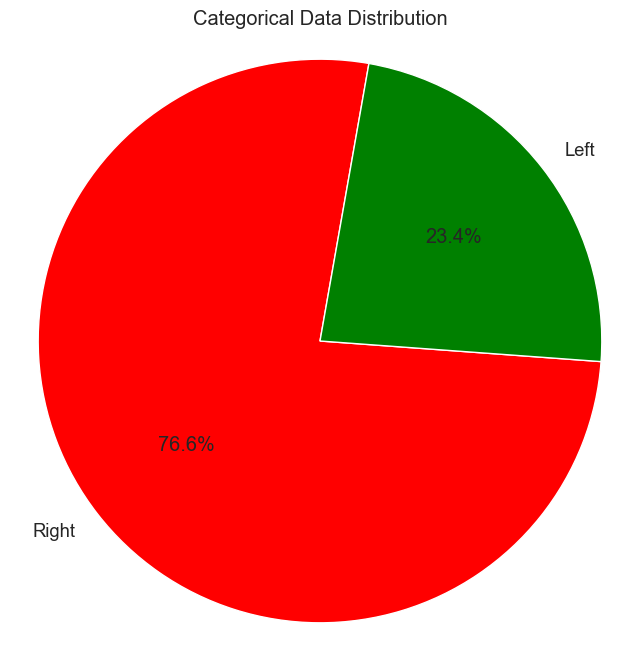

In [149]:
# Get unique values and their counts from the 'column_name' column
value_counts = mid_df['Preffered_Foot'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
colors = ['red', 'green']
plt.pie(value_counts, labels=value_counts.index,
        autopct='%1.1f%%', startangle=80, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Categorical Data Distribution')

plt.show()

In [150]:
mid_df.loc[mid_df['Rating'].idxmax()]['Name']

'Cristiano Ronaldo'

In [151]:
mid_df.loc[mid_df['Rating'].idxmin()]['Name']

'Callum Cooke'

The highly and least rated midfielder namely, Cristiano Ronaldo and Callum Cooke.

In [152]:
mid_df.columns

Index(['Name', 'Nationality', 'Club', 'Club_Position', 'Club_Kit',
       'Club_Joining', 'Contract_Expiry', 'Rating', 'Height', 'Weight',
       'Preffered_Foot', 'Birth_Date', 'Age', 'Preffered_Position',
       'Work_Rate', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling',
       'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression',
       'Reactions', 'Attacking_Position', 'Interceptions', 'Vision',
       'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration',
       'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
       'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
       'Freekick_Accuracy', 'Penalties', 'Volleys', 'GK_Positioning',
       'GK_Diving', 'GK_Kicking', 'GK_Handling', 'GK_Reflexes', 'Height (m)',
       'BMI', 'Positions'],
      dtype='object')

In [153]:
numeric_mid_df = mid_df[['Rating',
                         'Age', 'Ball_Control', 'Dribbling',
                         'Aggression',
                         'Attacking_Position', 'Vision',
                         'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration',
                         'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
                         'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
                         'Freekick_Accuracy', 'Penalties', 'Volleys']]

In [154]:
numeric_mid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2882 entries, 0 to 17461
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Rating              2882 non-null   int64
 1   Age                 2882 non-null   int64
 2   Ball_Control        2882 non-null   int64
 3   Dribbling           2882 non-null   int64
 4   Aggression          2882 non-null   int64
 5   Attacking_Position  2882 non-null   int64
 6   Vision              2882 non-null   int64
 7   Composure           2882 non-null   int64
 8   Crossing            2882 non-null   int64
 9   Short_Pass          2882 non-null   int64
 10  Long_Pass           2882 non-null   int64
 11  Acceleration        2882 non-null   int64
 12  Stamina             2882 non-null   int64
 13  Strength            2882 non-null   int64
 14  Balance             2882 non-null   int64
 15  Agility             2882 non-null   int64
 16  Jumping             2882 non-null   int64
 17 

<Figure size 1200x600 with 0 Axes>

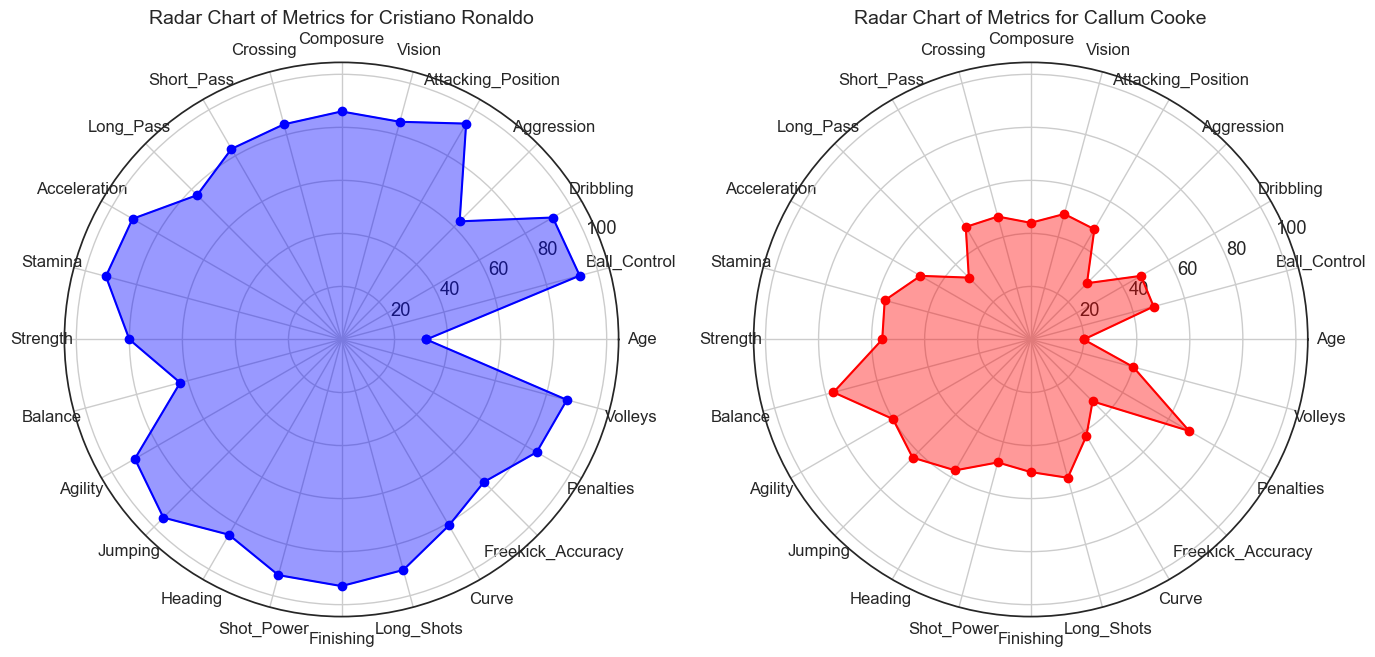

In [155]:
# Find the player with the highest rating
highest_rated_mid_name = numeric_mid_df['Rating'].idxmax() 
highest_rated_mid_metrics = numeric_mid_df.loc[highest_rated_mid_name, :].drop('Rating')
player_name_highest = mid_df.loc[mid_df['Rating'].idxmax()]['Name']

# Find the player with the lowest rating
lowest_rated_mid_name = numeric_mid_df['Rating'].idxmin()
lowest_rated_mid_metrics = numeric_mid_df.loc[lowest_rated_mid_name, :].drop('Rating')
player_name_lowest = mid_df.loc[mid_df['Rating'].idxmin()]['Name']

# Calculate the maximum value among metrics for both players
max_metric_value = max(highest_rated_mid_metrics.max(), lowest_rated_mid_metrics.max())

# Number of metrics
num_metrics = len(highest_rated_mid_metrics)

# Calculate angles for each axis
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False)

# Closing the radar plot
angles = np.concatenate((angles, [angles[0]]))

# Creating the plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), subplot_kw=dict(polar=True))

# Set custom colors for the lines and fill areas
colors = ['blue', 'red', 'yellow']

# Plot the metrics for the highest rated player
ax1.plot(angles, highest_rated_mid_metrics.tolist() + [highest_rated_mid_metrics.iloc[0]], marker='o', label=highest_rated_def_name, color=colors[0])
ax1.fill(angles, highest_rated_mid_metrics.tolist() + [highest_rated_mid_metrics.iloc[0]], alpha=0.4, color=colors[0])

# Set the labels for each axis and adjust font size
ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(highest_rated_mid_metrics.index, fontsize=12)
ax1.set_title(f'Radar Chart of Metrics for {player_name_highest}', fontsize=14)
# ax1.legend(loc='upper left')

# Plot the metrics for the lowest rated player
ax2.plot(angles, lowest_rated_mid_metrics.tolist() + [lowest_rated_mid_metrics.iloc[0]], marker='o', label=lowest_rated_def_name, color=colors[1])
ax2.fill(angles, lowest_rated_mid_metrics.tolist() + [lowest_rated_mid_metrics.iloc[0]], alpha=0.4, color=colors[1])

# Set the labels for each axis and adjust font size
ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(lowest_rated_mid_metrics.index, fontsize=12)
ax2.set_title(f'Radar Chart of Metrics for {player_name_lowest}', fontsize=14)
# ax2.legend(loc='upper left')

# Set the same y-axis limit for both subplots (slightly above max_metric_value)
y_max = max_metric_value * 1.1
ax1.set_ylim(0, y_max)
ax2.set_ylim(0, y_max)

# Add grid lines
ax1.grid(True)
ax2.grid(True)

# Tight layout for proper spacing
plt.tight_layout()

# Show the plot
plt.show()

Comparing the highly rated and least rated midfielders. Below we will compare three players, highly, average and least rated videos.

In [156]:
mean_rating = numeric_mid_df['Rating'].mean()
mean_age= numeric_mid_df['Age'].mean()
print('The average defender rating is ', round(mean_rating))
print('The average defender age is ', round(mean_age))

The average defender rating is  70
The average defender age is  27


In [157]:
mid_df[(mid_df['Rating'] == 70) & (mid_df['Age'] == 27)].head() # got 4881

Name     Nationality             Club Club_Position  Club_Kit  \
4668   Gonzalo Papa         Uruguay          Sarandí           CDM      33.0   
4811   Gonzalo Díaz       Argentina  Vélez Sarsfield            LM      20.0   
4843    Kim Min Woo  Korea Republic  Suwon Bluewings           LDM      11.0   
4856   Aníbal Godoy          Panama   SJ Earthquakes           LCM      30.0   
4872  Ibrahima Seck         Senegal   Waasl. Beveren           LDM      15.0   

     Club_Joining  Contract_Expiry  Rating  Height  Weight  ... Penalties  \
4668   01/28/2016           2017.0      70   178.0    71.0  ...        50   
4811   07/05/2016           2017.0      70   169.0    72.0  ...        64   
4843   01/01/2017           2018.0      70   172.0    69.0  ...        53   
4856   08/06/2015           2023.0      70   182.0    75.0  ...        36   
4872   07/01/2016           2018.0      70   194.0    87.0  ...        43   

     Volleys  GK_Positioning GK_Diving GK_Kicking  GK_Handling  GK_Reflexes  \
4668      35               9        11         13           15           13   
4811      57               9         9         15           12           10   
4843      53              16        11         14            6           10   
4856      31               9         8         14           15            6   
4872      32               9        14          8           15           15   

      Height (m)    BMI   Positions  
4668        1.78  22.41  Midfielder  
4811        1.69  25.21  Midfielder  
4843        1.72  23.32  Midfielder  
4856        1.82  22.64  Midfielder  
4872        1.94  23.12  Midfielder  

[5 rows x 54 columns]

<Figure size 1600x800 with 0 Axes>

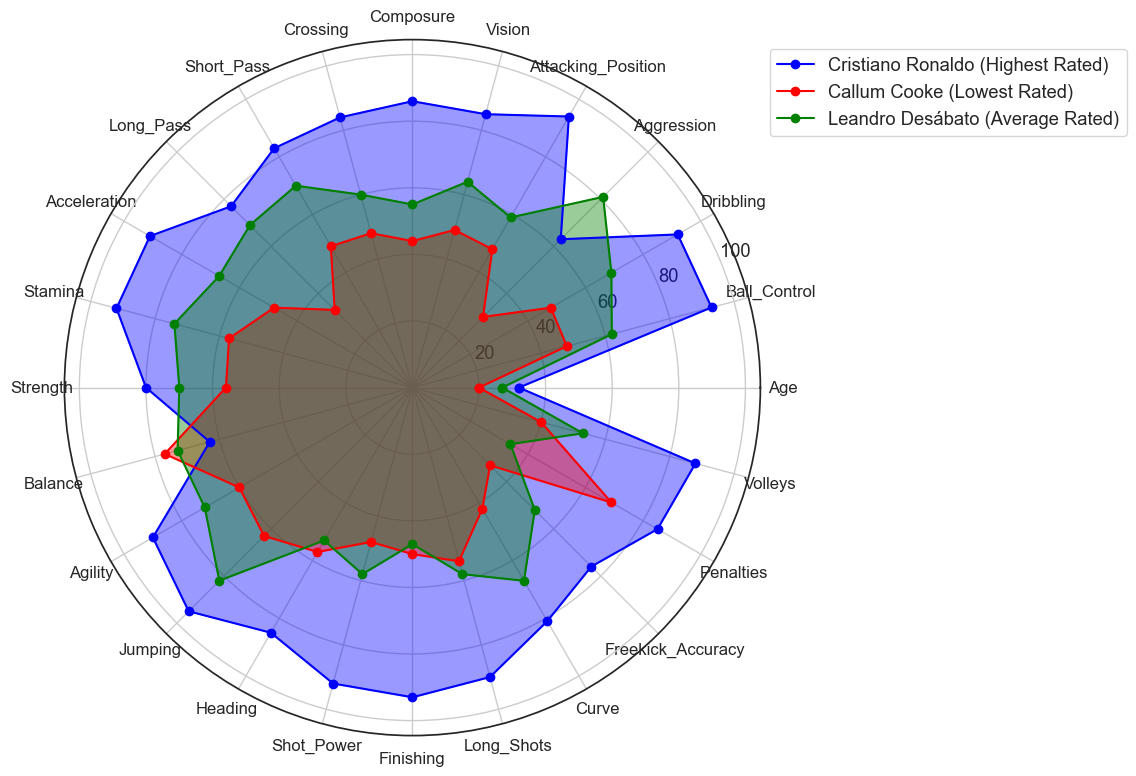

In [158]:
# Create the figure and subplot for the combined radar chart
plt.figure(figsize=(16, 8))  # Adjust figure size as needed
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(polar=True))

# Find the player with the average rating
average_rated_mid_name = 4881
average_rated_mid_metrics = numeric_mid_df.loc[average_rated_mid_name, :].drop('Rating')
player_name_average = mid_df.loc[4881]['Name']

# Set custom colors for the radar lines and fill areas
colors = ['blue', 'red', 'yellow', 'green']

# Plot the metrics for the highest-rated player
ax.plot(angles, highest_rated_mid_metrics.tolist() + [highest_rated_mid_metrics.iloc[0]], marker='o', label=f'{player_name_highest} (Highest Rated)', color=colors[0])
ax.fill(angles, highest_rated_mid_metrics.tolist() + [highest_rated_mid_metrics.iloc[0]], alpha=0.4, color=colors[0])

# Plot the metrics for the lowest-rated player
ax.plot(angles, lowest_rated_mid_metrics.tolist() + [lowest_rated_mid_metrics.iloc[0]], marker='o', label=f'{player_name_lowest} (Lowest Rated)', color=colors[1])
ax.fill(angles, lowest_rated_mid_metrics.tolist() + [lowest_rated_mid_metrics.iloc[0]], alpha=0.4, color=colors[1])

# Plot the metrics for the average-rated player
ax.plot(angles, average_rated_mid_metrics.tolist() + [average_rated_mid_metrics.iloc[0]], marker='o', label=f'{player_name_average} (Average Rated)', color=colors[3])
ax.fill(angles, average_rated_mid_metrics.tolist() + [average_rated_mid_metrics.iloc[0]], alpha=0.4, color=colors[3])

# Set the labels for each axis and adjust font size
ax.set_xticks(angles[:-1])
ax.set_xticklabels(highest_rated_mid_metrics.index, fontsize=12)
# ax.set_title(f'Radar Chart of Metrics for {player_name_highest}, {player_name_lowest}, and {player_name_average}', fontsize=14)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust the legend location as needed

# Set the y-axis limit (slightly above max_metric_value)
y_max = max_metric_value * 1.1
ax.set_ylim(0, y_max)

# Add grid lines
ax.grid(True)

# Tight layout for proper spacing
plt.tight_layout()

# Show the plot
plt.show()

Just like all the other radar charts, we can see the highly rated player has a wider web than the other players with lower ratings.

## Correlation

In [159]:
mid_corr = mid_df[['Rating',
                   'Age', 'Skill_Moves', 'Ball_Control', 'Dribbling',
                   'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression',
                   'Attacking_Position', 'Interceptions', 'Vision',
                   'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration',
                  'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
                   'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
                   'Freekick_Accuracy', 'Penalties', 'Volleys', 'Height (m)']]

<Axes: >

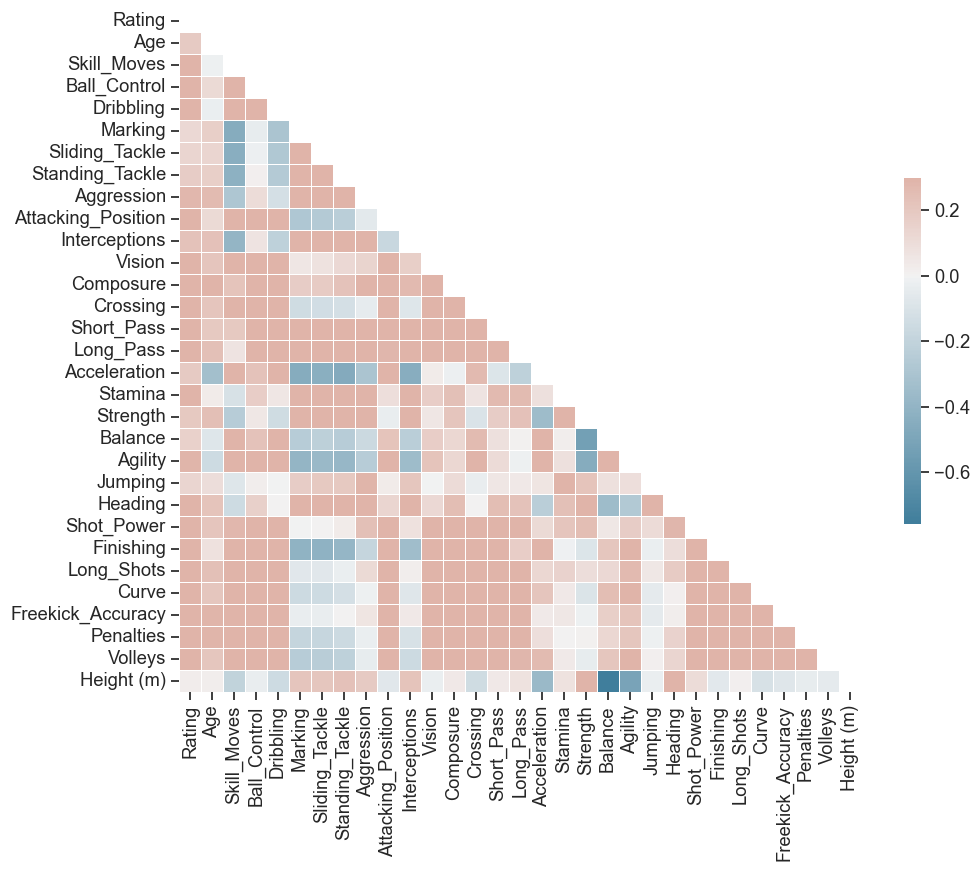

In [160]:
# calculate the correlation in the football attributes
corr = mid_corr.corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ration
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Strikers

In [161]:
df[df['Positions'] == 'Striker'].head()

Name Nationality             Club Club_Position  Club_Kit  \
19    Antoine Griezmann      France  Atlético Madrid            RS       7.0   
56     Radja Nainggolan     Belgium             Roma            LF       4.0   
65           Harry Kane     England            Spurs            RS      10.0   
159  Sebastian Giovinco       Italy       Toronto FC            LS      10.0   
160     Anthony Modeste      France       1. FC Köln            LS      27.0   

    Club_Joining  Contract_Expiry  Rating  Height  Weight  ... Penalties  \
19    07/29/2014           2021.0      88   176.0    67.0  ...        71   
56    01/07/2014           2020.0      86   176.0    65.0  ...        63   
65    07/01/2010           2022.0      85   188.0    86.0  ...        82   
159   02/03/2015           2019.0      83   164.0    59.0  ...        75   
160   07/01/2015           2021.0      83   187.0    84.0  ...        77   

    Volleys  GK_Positioning GK_Diving GK_Kicking  GK_Handling  GK_Reflexes  \
19       87              13        14         14            8           14   
56       75               8        11         14           11           11   
65       70              14         8         11           10           11   
159      70               3         6          6            3            3   
160      87               6        10         11           11            8   

     Height (m)    BMI  Positions  
19         1.76  21.63    Striker  
56         1.76  20.98    Striker  
65         1.88  24.33    Striker  
159        1.64  21.94    Striker  
160        1.87  24.02    Striker  

[5 rows x 54 columns]

In [162]:
str_df = df[df['Positions'] == 'Striker']
str_df.head()

Name Nationality             Club Club_Position  Club_Kit  \
19    Antoine Griezmann      France  Atlético Madrid            RS       7.0   
56     Radja Nainggolan     Belgium             Roma            LF       4.0   
65           Harry Kane     England            Spurs            RS      10.0   
159  Sebastian Giovinco       Italy       Toronto FC            LS      10.0   
160     Anthony Modeste      France       1. FC Köln            LS      27.0   

    Club_Joining  Contract_Expiry  Rating  Height  Weight  ... Penalties  \
19    07/29/2014           2021.0      88   176.0    67.0  ...        71   
56    01/07/2014           2020.0      86   176.0    65.0  ...        63   
65    07/01/2010           2022.0      85   188.0    86.0  ...        82   
159   02/03/2015           2019.0      83   164.0    59.0  ...        75   
160   07/01/2015           2021.0      83   187.0    84.0  ...        77   

    Volleys  GK_Positioning GK_Diving GK_Kicking  GK_Handling  GK_Reflexes  \
19       87              13        14         14            8           14   
56       75               8        11         14           11           11   
65       70              14         8         11           10           11   
159      70               3         6          6            3            3   
160      87               6        10         11           11            8   

     Height (m)    BMI  Positions  
19         1.76  21.63    Striker  
56         1.76  20.98    Striker  
65         1.88  24.33    Striker  
159        1.64  21.94    Striker  
160        1.87  24.02    Striker  

[5 rows x 54 columns]

In [163]:
str_df.describe()

Club_Kit  Contract_Expiry      Rating      Height      Weight  \
count  439.000000       439.000000  439.000000  439.000000  439.000000   
mean    18.259681      2018.954442   68.858770  181.558087   76.592255   
std     15.226629         1.662842    5.835109    6.270222    6.675453   
min      3.000000      2017.000000   54.000000  163.000000   50.000000   
25%      9.500000      2018.000000   65.000000  177.000000   72.000000   
50%     13.000000      2019.000000   68.000000  181.000000   76.000000   
75%     21.500000      2020.000000   73.000000  186.000000   81.000000   
max     99.000000      2023.000000   88.000000  199.000000  102.000000   

              Age   Weak_foot  Skill_Moves  Ball_Control   Dribbling  ...  \
count  439.000000  439.000000   439.000000    439.000000  439.000000  ...   
mean    27.020501    3.150342     2.740319     67.824601   66.371298  ...   
std      3.968142    0.662218     0.652351      7.545826    8.219933  ...   
min     18.000000    1.000000     2.000000     44.000000   43.000000  ...   
25%     24.000000    3.000000     2.000000     63.000000   61.000000  ...   
50%     27.000000    3.000000     3.000000     67.000000   67.000000  ...   
75%     30.000000    4.000000     3.000000     73.000000   72.000000  ...   
max     38.000000    5.000000     5.000000     88.000000   87.000000  ...   

       Freekick_Accuracy   Penalties     Volleys  GK_Positioning   GK_Diving  \
count         439.000000  439.000000  439.000000      439.000000  439.000000   
mean           49.913440   64.697039   62.164009       10.708428   10.517084   
std            14.009676    8.631035    9.724538        3.297529    3.302698   
min            22.000000   33.000000   28.000000        1.000000    1.000000   
25%            38.000000   59.000000   56.000000        8.000000    8.000000   
50%            48.000000   65.000000   63.000000       11.000000   10.000000   
75%            60.000000   71.000000   69.000000       13.000000   13.000000   
max            86.000000   86.000000   87.000000       19.000000   16.000000   

       GK_Kicking  GK_Handling  GK_Reflexes  Height (m)         BMI  
count  439.000000   439.000000   439.000000  439.000000  439.000000  
mean    10.954442    10.658314    10.936219    1.815581   23.222984  
std      3.320439     3.185565     3.371995    0.062702    1.509820  
min      1.000000     1.000000     1.000000    1.630000   18.390000  
25%      8.000000     8.000000     8.000000    1.770000   22.340000  
50%     11.000000    11.000000    11.000000    1.810000   23.150000  
75%     14.000000    13.000000    14.000000    1.860000   24.070000  
max     21.000000    16.000000    21.000000    1.990000   30.740000  

[8 rows x 44 columns]

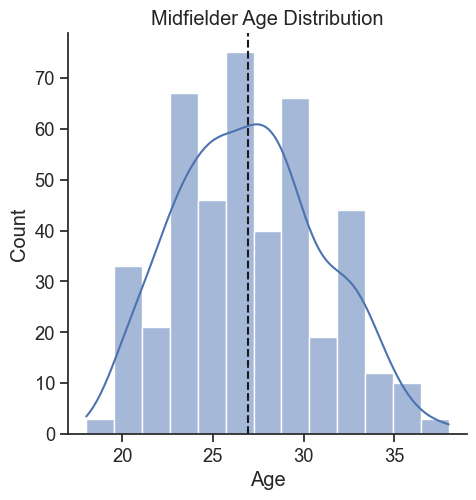

In [164]:
sns.displot(data=str_df,
           x='Age',
           kde='kde')
ax = plt.gca()
ax.set_title('Midfielder Age Distribution')
ax.axvline(def_df['Age'].mean(), color='k',ls='--')
plt.show()

In [165]:
print('The average age for strikers is, ', round(str_df['Age'].mean()))

The average age for strikers is,  27


In [166]:
str_df.columns

Index(['Name', 'Nationality', 'Club', 'Club_Position', 'Club_Kit',
       'Club_Joining', 'Contract_Expiry', 'Rating', 'Height', 'Weight',
       'Preffered_Foot', 'Birth_Date', 'Age', 'Preffered_Position',
       'Work_Rate', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling',
       'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression',
       'Reactions', 'Attacking_Position', 'Interceptions', 'Vision',
       'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration',
       'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
       'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
       'Freekick_Accuracy', 'Penalties', 'Volleys', 'GK_Positioning',
       'GK_Diving', 'GK_Kicking', 'GK_Handling', 'GK_Reflexes', 'Height (m)',
       'BMI', 'Positions'],
      dtype='object')

In [167]:
str_df = str_df[['Name', 'Nationality', 'Club', 'Club_Position',
                 'Club_Joining', 'Contract_Expiry', 'Rating', 'Height', 'Weight',
                 'Preffered_Foot', 'Birth_Date', 'Age', 'Preffered_Position',
                 'Work_Rate', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling',
                 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression',
                 'Reactions', 'Attacking_Position', 'Interceptions', 'Vision',
                 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration',
                 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
                 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
                 'Freekick_Accuracy', 'Penalties', 'Volleys']]

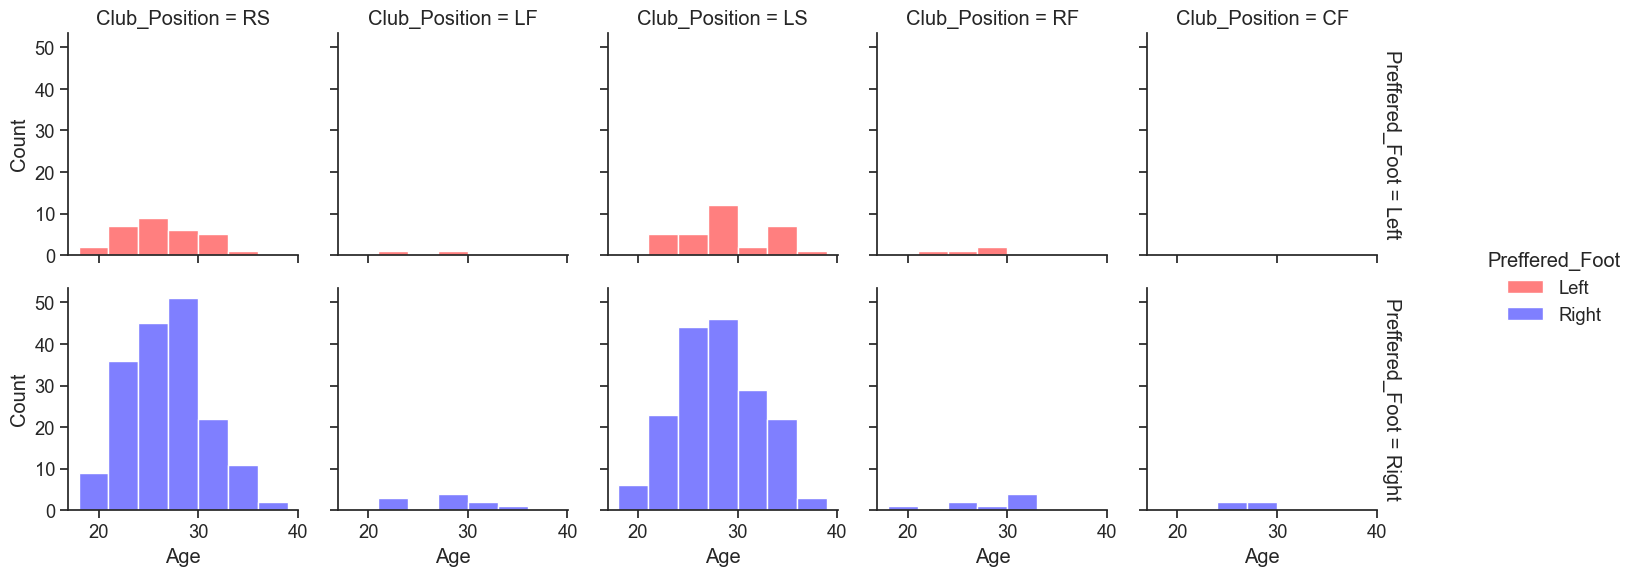

In [168]:
sns.set(style='ticks', font_scale=1.2)

# create a pairplot
sns.displot(str_df, x='Age', col='Club_Position', row='Preffered_Foot', hue='Preffered_Foot',
           binwidth=3, height=3, facet_kws=dict(margin_titles=True), palette=custom_palette
           )

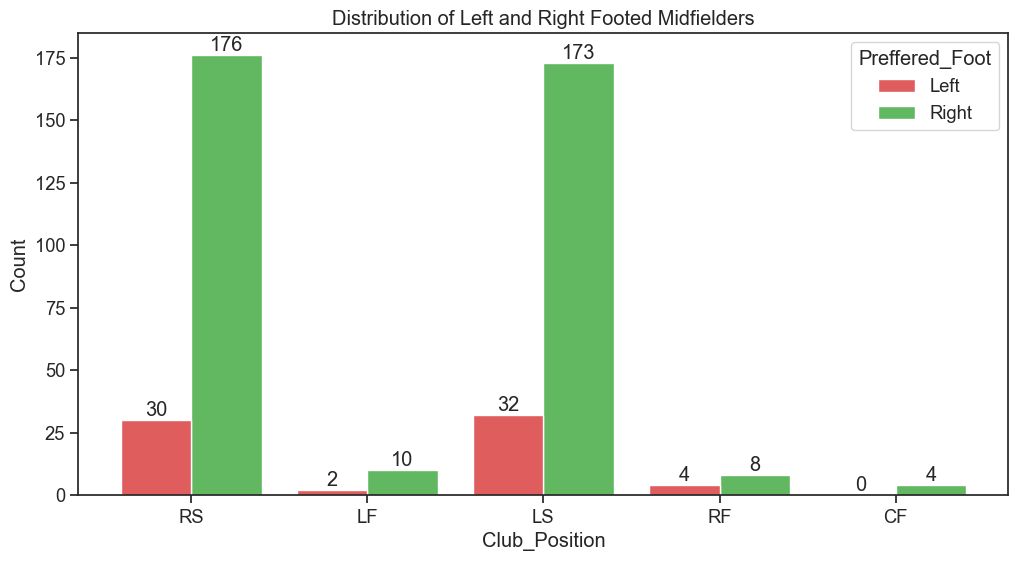

In [169]:
'''
Creating a similar graph as the one above but now directly comparing the left and right footed players.
'''
fig, ax1 = plt.subplots(figsize=(12,6))

# creating a pallete dict for the different colours
palette = {
    'Right': 'tab:green',
    'Left': 'tab:red',
}


ax = sns.histplot(data=str_df, x="Club_Position",
             hue="Preffered_Foot", multiple="dodge", palette=palette, shrink=.8)

# label the x-values
for container in ax.containers: 
    ax.bar_label(container)


ax = plt.gca()
ax.set_title('Distribution of Left and Right Footed Midfielders')
plt.show()

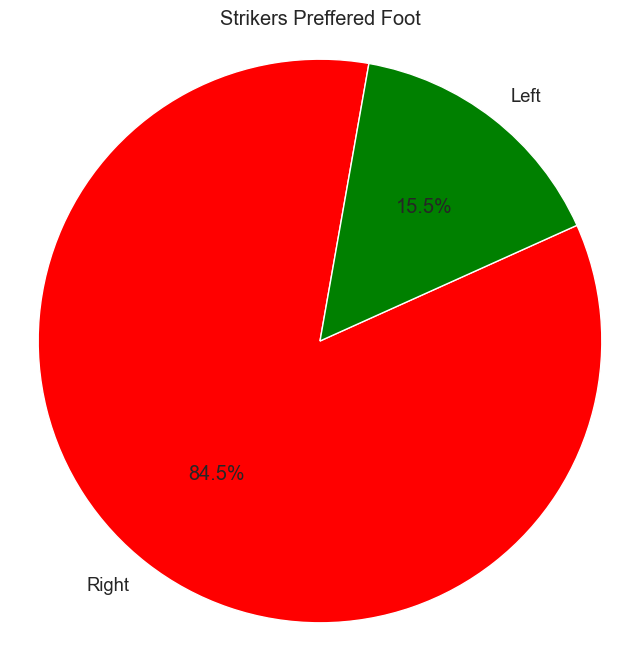

In [170]:
# Get unique values and their counts from the 'column_name' column
value_counts = str_df['Preffered_Foot'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
colors = ['red', 'green']
plt.pie(value_counts, labels=value_counts.index,
        autopct='%1.1f%%', startangle=80, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Strikers Preffered Foot')

plt.show()

There are way less left footed players in the striker position than the midfield players.

In [171]:
str_df.loc[str_df['Rating'].idxmax()]['Name']

'Antoine Griezmann'

In [172]:
str_df.loc[str_df['Rating'].idxmin()]['Name']

'Padraic Cunningham'

In [173]:
str_df.columns

Index(['Name', 'Nationality', 'Club', 'Club_Position', 'Club_Joining',
       'Contract_Expiry', 'Rating', 'Height', 'Weight', 'Preffered_Foot',
       'Birth_Date', 'Age', 'Preffered_Position', 'Work_Rate', 'Weak_foot',
       'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys'],
      dtype='object')

In [174]:
numeric_str_df = str_df[['Rating', 'Age', 'Ball_Control', 'Dribbling', 'Aggression', 'Reactions', 'Attacking_Position',
                         'Vision', 'Composure', 'Crossing', 'Short_Pass',
                         'Long_Pass', 'Acceleration', 'Stamina', 'Strength', 'Balance',
                         'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
                         'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys'
                         ]]

<Figure size 1200x600 with 0 Axes>

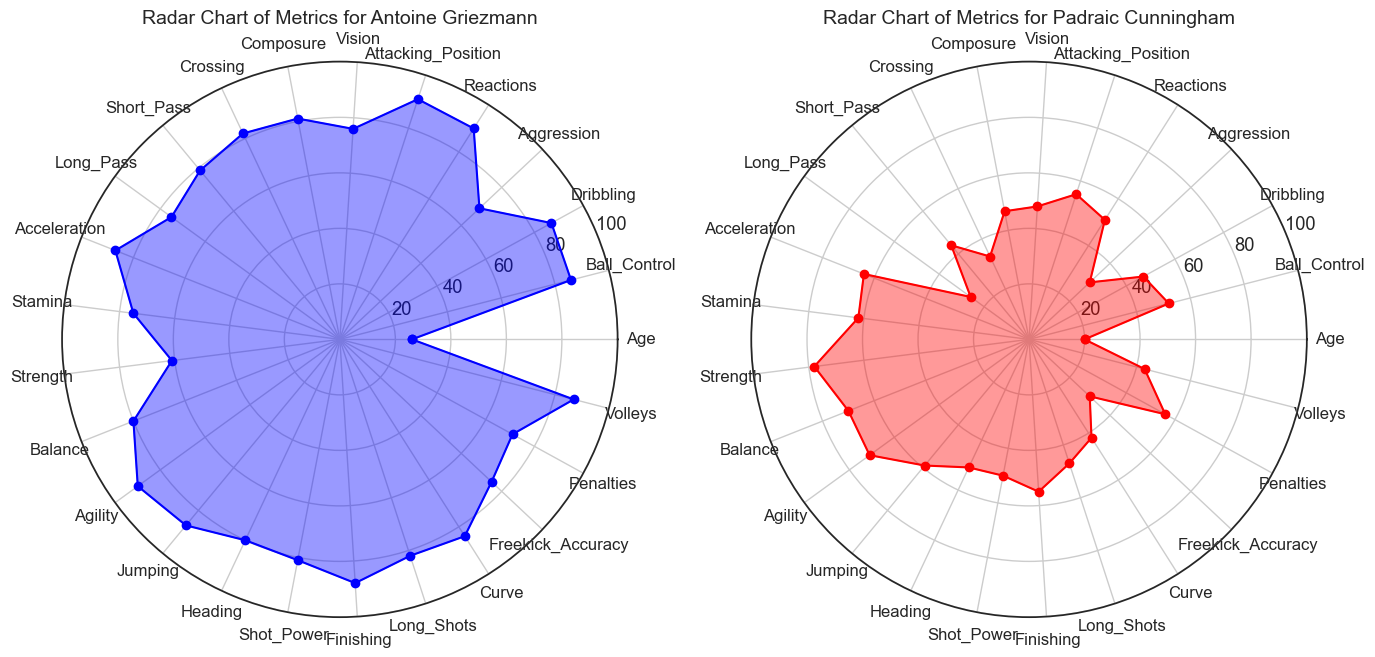

In [175]:
# Find the player with the highest rating
highest_rated_str_name = numeric_str_df['Rating'].idxmax() 
highest_rated_str_metrics = numeric_str_df.loc[highest_rated_str_name, :].drop('Rating')
player_name_highest = str_df.loc[str_df['Rating'].idxmax()]['Name']

# Find the player with the lowest rating
lowest_rated_str_name = numeric_str_df['Rating'].idxmin()
lowest_rated_str_metrics = numeric_str_df.loc[lowest_rated_str_name, :].drop('Rating')
player_name_lowest = str_df.loc[str_df['Rating'].idxmin()]['Name']

# Calculate the maximum value among metrics for both players
max_metric_value = max(highest_rated_str_metrics.max(), lowest_rated_mid_metrics.max())

# Number of metrics
num_metrics = len(highest_rated_str_metrics)

# Calculate angles for each axis
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False)

# Closing the radar plot
angles = np.concatenate((angles, [angles[0]]))

# Creating the plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), subplot_kw=dict(polar=True))

# Set custom colors for the lines and fill areas
colors = ['blue', 'red', 'yellow']

# Plot the metrics for the highest rated player
ax1.plot(angles, highest_rated_str_metrics.tolist() + [highest_rated_str_metrics.iloc[0]], marker='o', label=highest_rated_def_name, color=colors[0])
ax1.fill(angles, highest_rated_str_metrics.tolist() + [highest_rated_str_metrics.iloc[0]], alpha=0.4, color=colors[0])

# Set the labels for each axis and adjust font size
ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(highest_rated_str_metrics.index, fontsize=12)
ax1.set_title(f'Radar Chart of Metrics for {player_name_highest}', fontsize=14)
# ax1.legend(loc='upper left')

# Plot the metrics for the lowest rated player
ax2.plot(angles, lowest_rated_str_metrics.tolist() + [lowest_rated_str_metrics.iloc[0]], marker='o', label=lowest_rated_def_name, color=colors[1])
ax2.fill(angles, lowest_rated_str_metrics.tolist() + [lowest_rated_str_metrics.iloc[0]], alpha=0.4, color=colors[1])

# Set the labels for each axis and adjust font size
ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(lowest_rated_str_metrics.index, fontsize=12)
ax2.set_title(f'Radar Chart of Metrics for {player_name_lowest}', fontsize=14)
# ax2.legend(loc='upper left')

# Set the same y-axis limit for both subplots (slightly above max_metric_value)
y_max = max_metric_value * 1.1
ax1.set_ylim(0, y_max)
ax2.set_ylim(0, y_max)

# Add grid lines
ax1.grid(True)
ax2.grid(True)

# Tight layout for proper spacing
plt.tight_layout()

# Show the plot
plt.show()

In [176]:
mean_rating = numeric_mid_df['Rating'].mean()
mean_age= numeric_mid_df['Age'].mean()
print('The average defender rating is ', round(mean_rating))
print('The average defender age is ', round(mean_age))

The average defender rating is  70
The average defender age is  27


In [177]:
# str_df[(str_df['Age'] == 27) & (str_df['Rating'] == 70)].sample(1) #4776

<Figure size 1600x800 with 0 Axes>

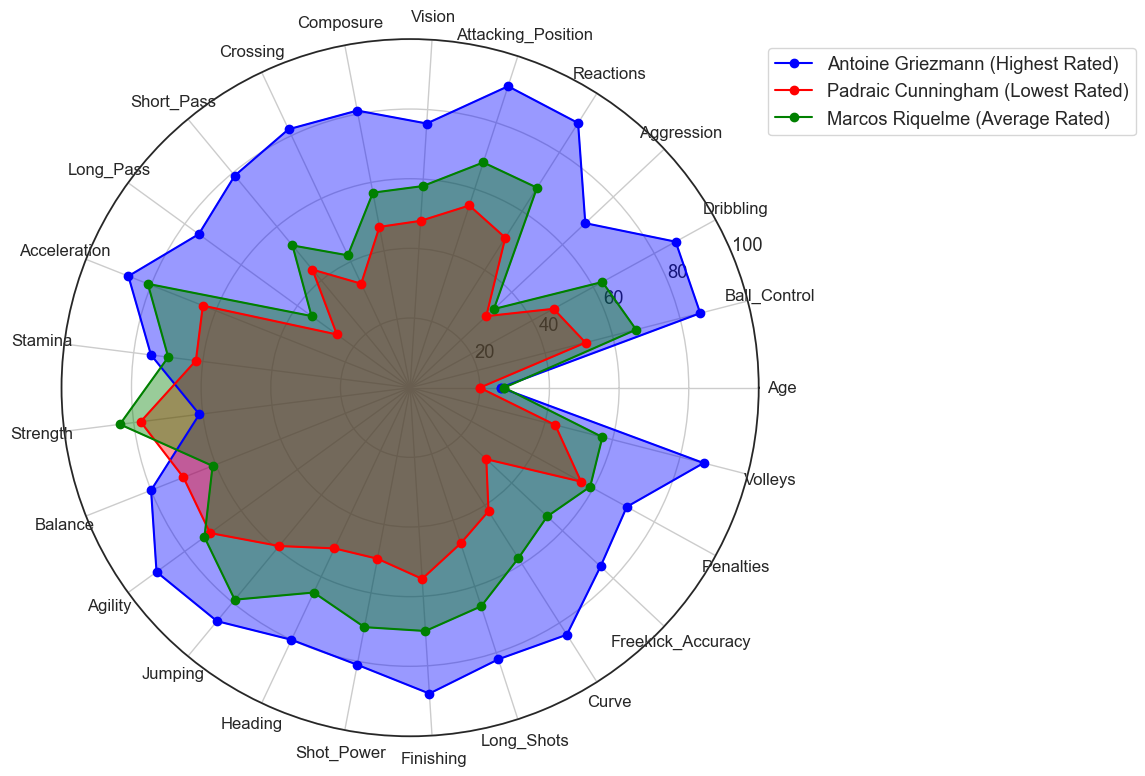

In [178]:
# Create the figure and subplot for the combined radar chart
plt.figure(figsize=(16, 8))  # Adjust figure size as needed
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(polar=True))

# Find the player with the average rating
average_rated_str_name = 4776
average_rated_str_metrics = numeric_str_df.loc[average_rated_str_name, :].drop('Rating')
player_name_average = str_df.loc[4776]['Name']

# Set custom colors for the radar lines and fill areas
colors = ['blue', 'red', 'yellow', 'green']

# Plot the metrics for the highest-rated player
ax.plot(angles, highest_rated_str_metrics.tolist() + [highest_rated_str_metrics.iloc[0]], marker='o', label=f'{player_name_highest} (Highest Rated)', color=colors[0])
ax.fill(angles, highest_rated_str_metrics.tolist() + [highest_rated_str_metrics.iloc[0]], alpha=0.4, color=colors[0])

# Plot the metrics for the lowest-rated player
ax.plot(angles, lowest_rated_str_metrics.tolist() + [lowest_rated_str_metrics.iloc[0]], marker='o', label=f'{player_name_lowest} (Lowest Rated)', color=colors[1])
ax.fill(angles, lowest_rated_str_metrics.tolist() + [lowest_rated_str_metrics.iloc[0]], alpha=0.4, color=colors[1])

# Plot the metrics for the average-rated player
ax.plot(angles, average_rated_str_metrics.tolist() + [average_rated_str_metrics.iloc[0]], marker='o', label=f'{player_name_average} (Average Rated)', color=colors[3])
ax.fill(angles, average_rated_str_metrics.tolist() + [average_rated_str_metrics.iloc[0]], alpha=0.4, color=colors[3])

# Set the labels for each axis and adjust font size
ax.set_xticks(angles[:-1])
ax.set_xticklabels(highest_rated_str_metrics.index, fontsize=12)
# ax.set_title(f'Radar Chart of Metrics for {player_name_highest}, {player_name_lowest}, and {player_name_average}', fontsize=14)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust the legend location as needed

# Set the y-axis limit (slightly above max_metric_value)
y_max = max_metric_value * 1.1
ax.set_ylim(0, y_max)

# Add grid lines
ax.grid(True)

# Tight layout for proper spacing
plt.tight_layout()

# Show the plot
plt.show()

## Correlation

In [179]:
str_corr = str_df[['Rating', 'Age', 'Ball_Control', 'Dribbling', 'Aggression', 'Reactions', 'Attacking_Position',
                         'Vision', 'Composure', 'Crossing', 'Short_Pass',
                         'Long_Pass', 'Acceleration', 'Stamina', 'Strength', 'Balance',
                         'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
                         'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys', 'Height'
                         ]]

<Axes: >

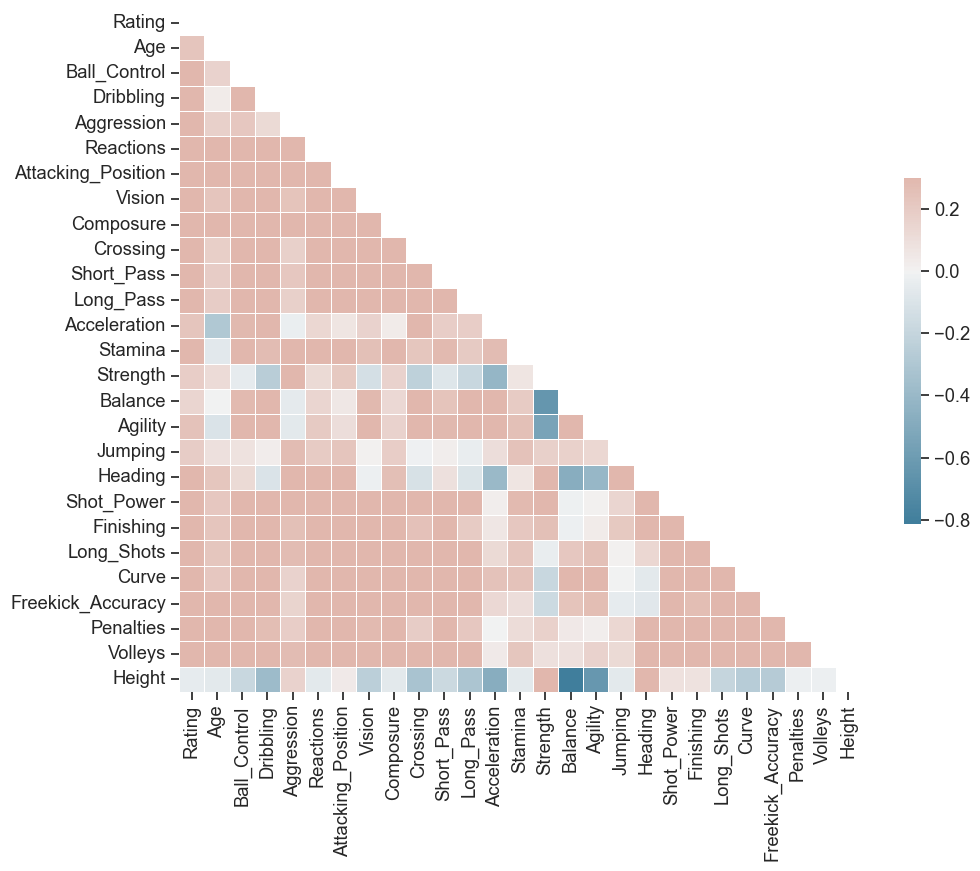

In [180]:
# calculate the correlation in the football attributes
corr = str_corr.corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ration
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 5. Feature Engineering <a name="feature-engineering"></a>
Describe how you engineered or selected the features used for modeling. Explain the rationale behind your choices and any domain-specific knowledge applied.

[Back to Top](#table-of-contents)

---


In [181]:
df.head()

Name Nationality          Club Club_Position  Club_Kit  \
0  Cristiano Ronaldo    Portugal   Real Madrid            LW       7.0   
1       Lionel Messi   Argentina  FC Barcelona            RW      10.0   
2             Neymar      Brazil  FC Barcelona            LW      11.0   
3        Luis Suárez     Uruguay  FC Barcelona            ST       9.0   
4       Manuel Neuer     Germany     FC Bayern            GK       1.0   

  Club_Joining  Contract_Expiry  Rating  Height  Weight  ... Penalties  \
0   07/01/2009           2021.0      94   185.0    80.0  ...        85   
1   07/01/2004           2018.0      93   170.0    72.0  ...        74   
2   07/01/2013           2021.0      92   174.0    68.0  ...        81   
3   07/11/2014           2021.0      92   182.0    85.0  ...        85   
4   07/01/2011           2021.0      92   193.0    92.0  ...        47   

  Volleys  GK_Positioning GK_Diving GK_Kicking  GK_Handling  GK_Reflexes  \
0      88              14         7         15           11           11   
1      85              14         6         15           11            8   
2      83              15         9         15            9           11   
3      88              33        27         31           25           37   
4      11              91        89         95           90           89   

   Height (m)    BMI    Positions  
0        1.85  23.37   Midfielder  
1        1.70  24.91   Midfielder  
2        1.74  22.46   Midfielder  
3        1.82  25.66      Reserve  
4        1.93  24.70  Goal Keeper  

[5 rows x 54 columns]

In [182]:
df.columns

Index(['Name', 'Nationality', 'Club', 'Club_Position', 'Club_Kit',
       'Club_Joining', 'Contract_Expiry', 'Rating', 'Height', 'Weight',
       'Preffered_Foot', 'Birth_Date', 'Age', 'Preffered_Position',
       'Work_Rate', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling',
       'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression',
       'Reactions', 'Attacking_Position', 'Interceptions', 'Vision',
       'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration',
       'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
       'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
       'Freekick_Accuracy', 'Penalties', 'Volleys', 'GK_Positioning',
       'GK_Diving', 'GK_Kicking', 'GK_Handling', 'GK_Reflexes', 'Height (m)',
       'BMI', 'Positions'],
      dtype='object')

In [183]:
df_sub = df[['Name', 'Nationality', 'Club_Position',
        'Rating', 'Height', 'Weight',
       'Preffered_Foot', 'Age', 'Preffered_Position',
       'Work_Rate', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling',
       'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression',
       'Reactions', 'Attacking_Position', 'Interceptions', 'Vision',
       'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration',
        'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
       'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
       'Freekick_Accuracy', 'Penalties', 'Volleys', 'GK_Positioning',
       'GK_Diving', 'GK_Kicking', 'GK_Handling', 'GK_Reflexes']]

In [184]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                17588 non-null  object 
 1   Nationality         17588 non-null  object 
 2   Club_Position       17587 non-null  object 
 3   Rating              17588 non-null  int64  
 4   Height              17588 non-null  float64
 5   Weight              17588 non-null  float64
 6   Preffered_Foot      17588 non-null  object 
 7   Age                 17588 non-null  int64  
 8   Preffered_Position  17588 non-null  object 
 9   Work_Rate           17588 non-null  object 
 10  Weak_foot           17588 non-null  int64  
 11  Skill_Moves         17588 non-null  int64  
 12  Ball_Control        17588 non-null  int64  
 13  Dribbling           17588 non-null  int64  
 14  Marking             17588 non-null  int64  
 15  Sliding_Tackle      17588 non-null  int64  
 16  Stan

Creating a subset of the `df` dataframe, this subset will be used for the feature engineering. I have only selected feature that we believe have a huge impact on how a player is profiled.

In [185]:
df_sub.head(1)

Name Nationality Club_Position  Rating  Height  Weight  \
0  Cristiano Ronaldo    Portugal            LW      94   185.0    80.0   

  Preffered_Foot  Age Preffered_Position   Work_Rate  ...  Long_Shots  Curve  \
0          Right   32              LW/ST  High / Low  ...          90     81   

   Freekick_Accuracy  Penalties  Volleys  GK_Positioning  GK_Diving  \
0                 76         85       88              14          7   

   GK_Kicking  GK_Handling  GK_Reflexes  
0          15           11           11  

[1 rows x 45 columns]

In [186]:
df_sub['Club_Position'].unique()

array(['LW', 'RW', 'ST', 'GK', 'Sub', 'RCM', 'CAM', 'LCB', 'LCM', 'RS',
       'RB', 'RCB', 'LM', 'LDM', 'RM', 'LB', 'CDM', 'RDM', 'LF', 'CB',
       'LAM', 'Res', 'CM', 'LS', 'RF', 'RWB', 'RAM', 'LWB', nan, 'CF'],
      dtype=object)

In [187]:
# mapping the strings to numeric values
position_mapping = {
    'LW': 1, 
    'RW': 2, 'ST': 3, 'GK': 4, 'Sub': 5, 'RCM': 6, 'CAM': 7, 'LCB': 8, 'LCM': 9, 'RS': 10,
       'RB': 11, 'RCB': 12, 'LM': 13, 'LDM': 14, 'RM': 15, 'LB':16, 'CDM': 17, 'RDM': 18, 'LF': 19, 'CB': 20,
       'LAM': 21, 'Res': 22, 'CM': 23, 'LS': 24, 'RF': 25, 'RWB': 26, 'RAM': 27, 'LWB': 28,'CF': 29, 'nan':5 #replacing nan with the mode (5)
}

# using the map function to apply the position mapping we've just created
df_sub['Club_Position_numeric'] = df_sub['Club_Position'].map(position_mapping)
# df_sub['Club_Position_numeric'].astype(int) #After the mapping the column is a float and we have to convert it to an int
df_sub['Club_Position_numeric'].fillna(df_sub['Club_Position_numeric'].mode())
df_sub['Club_Position_numeric'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., nan, 29.])

I cant seem to remove the `nan` in the unique values, I have mapped it but still cannot remove it. 

**Preffered Foot**

In [188]:
df_sub['Preffered_Foot'].unique()

array(['Right', 'Left'], dtype=object)

In [189]:
preffered_foot_mapping = {
    'Right': 1,
    'Left': 2
}

# using the map function to apply the position mapping we've just created
df_sub['Preffered_Foot_numeric'] = df_sub['Preffered_Foot'].map(preffered_foot_mapping)
df_sub['Preffered_Foot_numeric'].unique()

array([1, 2], dtype=int64)

### Preffered Position

In [190]:
df_sub['Preffered_Position'].unique()

array(['LW/ST', 'RW', 'LW', 'ST', 'GK', 'CB', 'LW/LM', 'CM/CDM', 'CAM/LW',
       'CM/CAM', 'ST/LW', 'CAM/RM/LM', 'LM/CAM', 'ST/RM', 'RB/CM', 'CM',
       'CAM/RM', 'CAM/LM', 'RM/RW', 'ST/CAM', 'LB/CM', 'RM/CAM',
       'CF/CAM/ST', 'CDM/CM', 'CM/CDM/LM', 'LB', 'LW/CAM', 'RW/CAM',
       'LM/LW', 'CAM/CDM', 'CAM/CM', 'CB/CDM', 'RB', 'CM/RM', 'LB/LM',
       'LM', 'CB/RB', 'CAM', 'CM/LW', 'CDM', 'RM', 'CB/LB', 'LM/RM',
       'ST/RW', 'CM/RW', 'RW/LW', 'CM/LM', 'CF/ST', 'ST/LM', 'RB/CB',
       'LM/CM/CAM', 'CAM/CF', 'CAM/ST', 'LW/CAM/LM', 'RB/RM', 'RM/LM',
       'CAM/LM/LW', 'LM/ST', 'RW/RM', 'CAM/ST/CF', 'CDM/CB', 'LB/CB',
       'RB/RWB', 'RW/ST', 'LW/CF', 'CDM/RM', 'RM/ST', 'LB/CDM', 'LM/RW',
       'RM/LW', 'RW/CM/LW', 'RB/RW', 'LB/RB', 'LB/LWB', 'CAM/RW', 'LW/RW',
       'CM/RB/CDM', 'CDM/RB', 'CM/CAM/LM', 'CF/RM', 'RB/LB', 'CF/CAM',
       'LM/CM', 'CF/LW', 'RM/CAM/ST', 'ST/RM/RW', 'CAM/CM/LM',
       'RB/RW/RWB', 'RM/RB', 'CM/CB', 'CAM/LM/CM', 'LWB/LB', 'CM/RB/RM',
       'LM/R

In [191]:
df_sub['Preffered_Position'] = df_sub['Preffered_Position'].str.replace('/', ', ')
# df_sub['Preffered_Position'] = df_sub['Preffered_Position'].apply(word_tokenize)
df_sub['Preffered_Position'] = df_sub['Preffered_Position'].str.lower()
df_sub['Preffered_Position'].unique()

array(['lw, st', 'rw', 'lw', 'st', 'gk', 'cb', 'lw, lm', 'cm, cdm',
       'cam, lw', 'cm, cam', 'st, lw', 'cam, rm, lm', 'lm, cam', 'st, rm',
       'rb, cm', 'cm', 'cam, rm', 'cam, lm', 'rm, rw', 'st, cam',
       'lb, cm', 'rm, cam', 'cf, cam, st', 'cdm, cm', 'cm, cdm, lm', 'lb',
       'lw, cam', 'rw, cam', 'lm, lw', 'cam, cdm', 'cam, cm', 'cb, cdm',
       'rb', 'cm, rm', 'lb, lm', 'lm', 'cb, rb', 'cam', 'cm, lw', 'cdm',
       'rm', 'cb, lb', 'lm, rm', 'st, rw', 'cm, rw', 'rw, lw', 'cm, lm',
       'cf, st', 'st, lm', 'rb, cb', 'lm, cm, cam', 'cam, cf', 'cam, st',
       'lw, cam, lm', 'rb, rm', 'rm, lm', 'cam, lm, lw', 'lm, st',
       'rw, rm', 'cam, st, cf', 'cdm, cb', 'lb, cb', 'rb, rwb', 'rw, st',
       'lw, cf', 'cdm, rm', 'rm, st', 'lb, cdm', 'lm, rw', 'rm, lw',
       'rw, cm, lw', 'rb, rw', 'lb, rb', 'lb, lwb', 'cam, rw', 'lw, rw',
       'cm, rb, cdm', 'cdm, rb', 'cm, cam, lm', 'cf, rm', 'rb, lb',
       'cf, cam', 'lm, cm', 'cf, lw', 'rm, cam, st', 'st, rm, rw',
     

In [192]:
# Split the 'Preferred_Position' column into a list of values
df_sub['Preffered_Position'] = df_sub['Preffered_Position'].str.split(', ')

# Get the unique values
unique_positions = set(position for positions_list in df_sub['Preffered_Position'] for position in positions_list)

# Create binary columns for each unique position
for position in unique_positions:
    df_sub[position] = df_sub['Preffered_Position'].apply(lambda x: int(position in x))

# Drop the original 'Preferred_Position' column
# df_sub = df_sub.drop('Preferred_Position', axis=1)

In [193]:
df_sub.columns

Index(['Name', 'Nationality', 'Club_Position', 'Rating', 'Height', 'Weight',
       'Preffered_Foot', 'Age', 'Preffered_Position', 'Work_Rate', 'Weak_foot',
       'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes', 'Club_Position_numeric', 'Preffered_Foot_numeric', 'rwb',
       'st', 'cb', 'rw', 'cdm', 'cm', 'rm', 'cam', 'lw', 'lb', 'rb', 'cf',
       'lm', 'gk', 'lwb'],
      dtype='object')

In [194]:
print(df_sub)

                    Name          Nationality Club_Position  Rating  Height  \
0      Cristiano Ronaldo             Portugal            LW      94   185.0   
1           Lionel Messi            Argentina            RW      93   170.0   
2                 Neymar               Brazil            LW      92   174.0   
3            Luis Suárez              Uruguay            ST      92   182.0   
4           Manuel Neuer              Germany            GK      92   193.0   
...                  ...                  ...           ...     ...     ...   
17583        Adam Dunbar  Republic of Ireland           Sub      45   183.0   
17584       Dylan McGoey  Republic of Ireland           Sub      45   185.0   
17585    Tommy Ouldridge              England           Res      45   173.0   
17586         Mark Foden             Scotland           Sub      45   180.0   
17587   Barry Richardson              England           Sub      45   185.0   

       Weight Preffered_Foot  Age Preffered_Positio

### Work Rate

In [195]:
df_sub['Work_Rate'].head()

0         High / Low
1    Medium / Medium
2      High / Medium
3      High / Medium
4    Medium / Medium
Name: Work_Rate, dtype: object

In [196]:
df_sub['Work_Rate'] = df_sub['Work_Rate'].str.replace('/', ',')
# df_sub['Preffered_Position'] = df_sub['Preffered_Position'].apply(word_tokenize)
df_sub['Work_Rate'] = df_sub['Work_Rate'].str.lower()
df_sub['Work_Rate'].head()

0         high , low
1    medium , medium
2      high , medium
3      high , medium
4    medium , medium
Name: Work_Rate, dtype: object

In [197]:
df_sub['Work_Rate'].unique()

array(['high , low', 'medium , medium', 'high , medium', 'medium , low',
       'high , high', 'medium , high', 'low , high', 'low , medium',
       'low , low'], dtype=object)

In [198]:
df_sub['Work_Rate'] = df_sub['Work_Rate'].str.split(', ')

# Get the unique values
unique_values = set(value for values_list in df_sub['Work_Rate'] for value in values_list)

# Create binary columns for each unique value
for value in unique_values:
    df_sub[value] = df_sub['Work_Rate'].apply(lambda x: int(value in x))


# Print the updated dataframe
print(df_sub)

                    Name          Nationality Club_Position  Rating  Height  \
0      Cristiano Ronaldo             Portugal            LW      94   185.0   
1           Lionel Messi            Argentina            RW      93   170.0   
2                 Neymar               Brazil            LW      92   174.0   
3            Luis Suárez              Uruguay            ST      92   182.0   
4           Manuel Neuer              Germany            GK      92   193.0   
...                  ...                  ...           ...     ...     ...   
17583        Adam Dunbar  Republic of Ireland           Sub      45   183.0   
17584       Dylan McGoey  Republic of Ireland           Sub      45   185.0   
17585    Tommy Ouldridge              England           Res      45   173.0   
17586         Mark Foden             Scotland           Sub      45   180.0   
17587   Barry Richardson              England           Sub      45   185.0   

       Weight Preffered_Foot  Age Preffered_Positio

In [199]:
# Drop the original 'Work_Rate' column
#df_sub = df_sub.drop('Work_Rate1', axis=1)
# Drop the original 'Work_Rate' column
#df_sub = df_sub.drop('Work_Rate2', axis=1)

In [200]:
df_sub.head()

Name Nationality Club_Position  Rating  Height  Weight  \
0  Cristiano Ronaldo    Portugal            LW      94   185.0    80.0   
1       Lionel Messi   Argentina            RW      93   170.0    72.0   
2             Neymar      Brazil            LW      92   174.0    68.0   
3        Luis Suárez     Uruguay            ST      92   182.0    85.0   
4       Manuel Neuer     Germany            GK      92   193.0    92.0   

  Preffered_Foot  Age Preffered_Position          Work_Rate  ...  cf  lm  gk  \
0          Right   32           [lw, st]       [high , low]  ...   0   0   0   
1           Left   29               [rw]  [medium , medium]  ...   0   0   0   
2          Right   25               [lw]    [high , medium]  ...   0   0   0   
3          Right   30               [st]    [high , medium]  ...   0   0   0   
4          Right   31               [gk]  [medium , medium]  ...   0   0   1   

   lwb  low  medium  low   high   high  medium   
0    0    1       0     0      1     0        0  
1    0    0       1     0      0     0        1  
2    0    0       1     0      1     0        0  
3    0    0       1     0      1     0        0  
4    0    0       1     0      0     0        1  

[5 rows x 68 columns]

# PCA and tSNE

In [201]:
df_sub.columns

Index(['Name', 'Nationality', 'Club_Position', 'Rating', 'Height', 'Weight',
       'Preffered_Foot', 'Age', 'Preffered_Position', 'Work_Rate', 'Weak_foot',
       'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes', 'Club_Position_numeric', 'Preffered_Foot_numeric', 'rwb',
       'st', 'cb', 'rw', 'cdm', 'cm', 'rm', 'cam', 'lw', 'lb', 'rb', 'cf',
       'lm', 'gk', 'lwb', 'low', 'medium', 'low ', 'high ', 'high', 'medium '],
      dtype='object')

In [202]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 68 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    17588 non-null  object 
 1   Nationality             17588 non-null  object 
 2   Club_Position           17587 non-null  object 
 3   Rating                  17588 non-null  int64  
 4   Height                  17588 non-null  float64
 5   Weight                  17588 non-null  float64
 6   Preffered_Foot          17588 non-null  object 
 7   Age                     17588 non-null  int64  
 8   Preffered_Position      17588 non-null  object 
 9   Work_Rate               17588 non-null  object 
 10  Weak_foot               17588 non-null  int64  
 11  Skill_Moves             17588 non-null  int64  
 12  Ball_Control            17588 non-null  int64  
 13  Dribbling               17588 non-null  int64  
 14  Marking                 17588 non-null

In [203]:
selected_columns = df_sub[['Rating', 'Height', 'Weight',
       'Age','Weak_foot',
       'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes', 'Preffered_Foot_numeric',
       'high ', 'low', 'medium', 'low ', 'high', 'medium ', 'cdm', 'gk', 'cb',
       'rwb', 'lb', 'cam', 'rb', 'cf', 'lm', 'cm', 'st', 'rm', 'lwb', 'rw',
       'lw']]

### scaling the selected the columns.

In [204]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_columns)

### PCA

In [205]:
# number of components to retain
n_components = 2

pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

#Create a df with the principal componets
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

### Visualizing the PCA

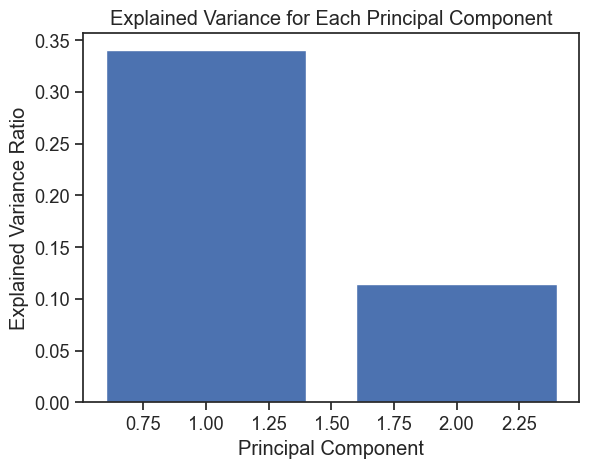

In [206]:
explained_variance = pca.explained_variance_ratio_
plt.bar(range(1, n_components + 1), explained_variance)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title('Explained Variance for Each Principal Component')
plt.show()

In [207]:
from sklearn.cluster import KMeans

# Assuming pca_df contains your principal components
kmeans = KMeans(n_clusters=4)  # Specify the number of clusters
pca_df['Cluster'] = kmeans.fit_predict(pca_df[['PC1', 'PC2']])


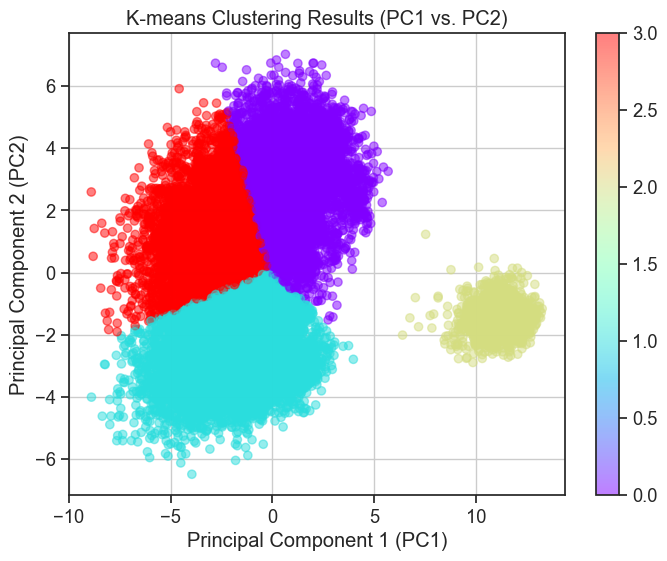

In [208]:
# Extract PC1 and PC2 values from pca_df
pc1_values = pca_df['PC1']
pc2_values = pca_df['PC2']

# Extract cluster assignments
cluster_labels = pca_df['Cluster']

# Create a scatterplot with different colors for each cluster
plt.figure(figsize=(8, 6))  # Set the figure size (adjust as needed)
plt.scatter(pc1_values, pc2_values, c=cluster_labels, cmap='rainbow', alpha=0.5)

# Label the axes
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')

# Set the title
plt.title('K-means Clustering Results (PC1 vs. PC2)')

# Add a colorbar legend
plt.colorbar()

# Show the plot
plt.grid(True)
plt.show()

In [209]:
!pip install plotly

In [210]:
import plotly.express as px

# Create a scatter plot with Plotly
fig = px.scatter(pca_df, x='PC1', y='PC2', color='Cluster',
                 labels={'PC1': 'Principal Component 1 (PC1)', 'PC2': 'Principal Component 2 (PC2)'},
                 title='K-means Clustering Results (PC1 vs. PC2)',
                 opacity=0.5)

# Adjust the plot layout
fig.update_layout(
    width=800,  # Set the width of the plot
    height=600,  # Set the height of the plot
    margin=dict(l=0, r=0, t=40, b=0),  # Adjust the margins
)

# Show the plot
fig.show()


## tSNE

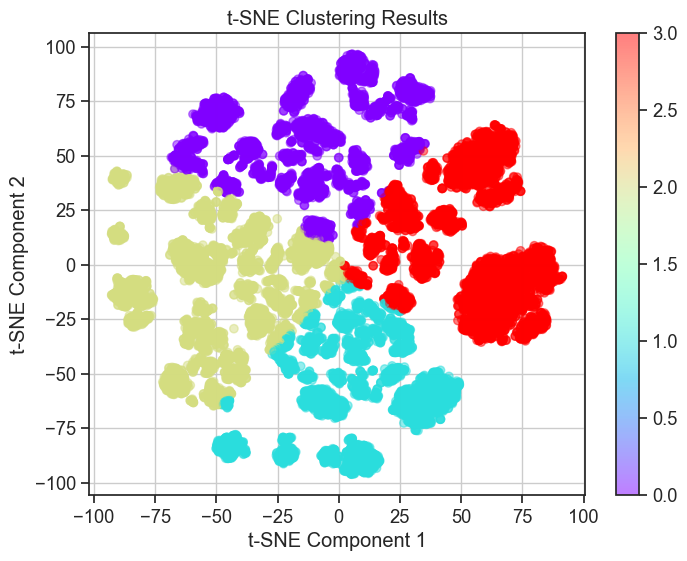

In [211]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

# Perform K-means clustering on the t-SNE results
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(tsne_results)

# Create a scatter plot of the t-SNE results colored by cluster
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['Cluster'], cmap='rainbow', alpha=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Clustering Results')
plt.colorbar()
plt.grid(True)
plt.show()

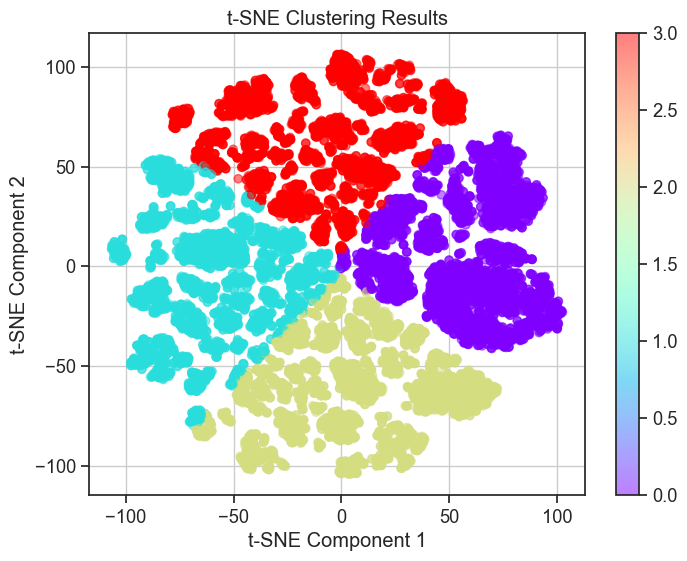

In [212]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=10, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

# Perform K-means clustering on the t-SNE results
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(tsne_results)

# Create a scatter plot of the t-SNE results colored by cluster
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['Cluster'], cmap='rainbow', alpha=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Clustering Results')
plt.colorbar()
plt.grid(True)
plt.show()

## Cosine Sim

In [213]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Load your dataset
#df = pd.read_csv('your_dataset.csv')

# Select the relevant columns for similarity calculation
selected_columns = [
    'Rating', 'Height', 'Weight', 'Age', 'Weak_foot',
    'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
    'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
    'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
    'Long_Pass', 'Acceleration', 'Stamina', 'Strength', 'Balance',
    'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
    'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
    'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
    'GK_Reflexes'
]

# Create a new DataFrame with only the selected columns
df_selected = df[selected_columns]

# Calculate cosine similarity matrix
similarity_matrix = cosine_similarity(df_selected)

# Function to get player recommendations
def get_player_recommendations(player_name, num_recommendations=10):
    player_index = df[df['Name'] == player_name].index[0]
    similar_players = list(enumerate(similarity_matrix[player_index]))
    similar_players = sorted(similar_players, key=lambda x: x[1], reverse=True)
    similar_players = similar_players[1:num_recommendations + 1]  # Exclude the player themselves
    recommended_players = [df.iloc[player[0]]['Name'] for player in similar_players]
    
    print(f"Recommended players for {player_name}:")
    for i, player in enumerate(recommended_players, start=1):
        print(f"{i}. {player}")

# Example usage:
player_name = 'Lionel Messi'
recommendations = get_player_recommendations(player_name)

Recommended players for Lionel Messi:
1. Neymar
2. Paulo Dybala
3. Giovani dos Santos
4. Eden Hazard
5. Sergio Agüero
6. Juan Mata
7. Arjen Robben
8. Giuseppe Rossi
9. Lorenzo Insigne
10. Franck Ribéry


In [214]:
get_player_recommendations(player_name)

Recommended players for Lionel Messi:
1. Neymar
2. Paulo Dybala
3. Giovani dos Santos
4. Eden Hazard
5. Sergio Agüero
6. Juan Mata
7. Arjen Robben
8. Giuseppe Rossi
9. Lorenzo Insigne
10. Franck Ribéry


# SCOUTGPT

In [215]:
# Select the relevant columns for similarity calculation
selected_columns = ['Rating', 'Height', 'Weight', 'Age', 'Weak_foot',
                    'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
                    'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
                    'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
                    'Long_Pass', 'Acceleration', 'Stamina', 'Strength', 'Balance',
                    'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
                    'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
                    'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
                    'GK_Reflexes', 'Preffered_Foot_numeric',
                    'high', 'low', 'medium', 'cdm', 'gk', 'cb',
                    'rwb', 'lb', 'cam', 'rb', 'cf', 'lm', 'cm', 'st', 'rm', 'lwb', 'rw', 'lw']

# Create a new DataFrame with only the selected columns
df_selected = df_sub[selected_columns]

# normalizing the selected columns
# Create a Min-Max scaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected columns
df_selected_scaled = scaler.fit_transform(df_selected)

# Calculate cosine similarity matrix
similarity_matrix = cosine_similarity(df_selected_scaled)

# Function to get player recommendations


def get_player_recommendations(player_name, num_recommendations=10):
    player_index = df[df['Name'] == player_name].index[0]
    similar_players = list(enumerate(similarity_matrix[player_index]))
    similar_players = sorted(similar_players, key=lambda x: x[1], reverse=True)
    # Exclude the player themselves
    similar_players = similar_players[1:num_recommendations + 1]
    recommended_players = [df.iloc[player[0]]['Name']
                           for player in similar_players]

    print(f"Recommended players for {player_name}:")
    for i, player in enumerate(recommended_players, start=1):
        print(f"{i}. {player}")


# Example usage:
player_name = 'Lionel Messi'
get_player_recommendations(player_name)

Recommended players for Lionel Messi:
1. Suso
2. Domenico Berardi
3. Juan Manuel Iturbe
4. Rachid Ghezzal
5. Antonio Piccolo
6. Gareth Bale
7. Mohamed Salah
8. Thomas Verhaar
9. Robert Murić
10. Cristian Buonaiuto


## 6. Modeling <a name="modeling"></a>
Discuss the machine learning or statistical models you utilized in your project. Include information on model selection, hyperparameter tuning, and model training.

[Back to Top](#table-of-contents)

---



## 7. Evaluation <a name="evaluation"></a>
Present the evaluation metrics used to assess the performance of your models. Discuss the results and any adjustments made based on the evaluation.

[Back to Top](#table-of-contents)

---


## 8. Conclusion <a name="Conclusion"></a>
Summarize your findings, the implications of your work, and potential areas for future improvement or research.

[Back to Top](#table-of-contents)